In [1]:
%cd mmdetection

/mnt/nas2/users/eslim/workspace/comp/mmdetection


In [2]:

import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="2"

In [3]:
# %pip install -e .


In [4]:
# !pip install --user fairscale

In [5]:
# !mkdir ./checkpoints
# !mim download mmdet --config rtmdet_tiny_8xb32-300e_coco --dest ./checkpoints

In [6]:
# !mim install "mmengine==0.7.1"
# !mim install "mmcv==2.0.0rc4"

In [7]:
# !pip install yapf==0.40.1

In [24]:
from mmdet.apis import DetInferencer

# Choose to use a config
# model_name = 'rtmdet_tiny_8xb32-300e_coco'
model_name = './projects/CO-DETR/configs/codino/co_dino_5scale_swin_l_16xb1_16e_custom.py'

# Setup a checkpoint file to load
# checkpoint = './checkpoints/co_dino_5scale_swin_large_16e_o365tococo-614254c9.pth'
checkpoint = "./work_dirs/co_dino_5scale_swin_l_16xb1_16e_custom/epoch_5.pth"

# Set the device to be used for evaluation
device = 'cuda:0'

# Initialize the DetInferencer
inferencer = DetInferencer(model_name, checkpoint, device)

# Use the detector to do inference
img = './demo/demo.jpg'
result = inferencer(img, out_dir='./output')

Loads checkpoint by local backend from path: ./work_dirs/co_dino_5scale_swin_l_16xb1_16e_custom/epoch_5.pth
08/31 05:19:32 - mmengine - INFO - 
rpn_conv.weight - torch.Size([256, 256, 3, 3]): 
NormalInit: mean=0, std=0.01, bias=0 
 
08/31 05:19:32 - mmengine - INFO - 
rpn_conv.bias - torch.Size([256]): 
NormalInit: mean=0, std=0.01, bias=0 
 
08/31 05:19:32 - mmengine - INFO - 
rpn_cls.weight - torch.Size([9, 256, 1, 1]): 
NormalInit: mean=0, std=0.01, bias=0 
 
08/31 05:19:32 - mmengine - INFO - 
rpn_cls.bias - torch.Size([9]): 
NormalInit: mean=0, std=0.01, bias=0 
 
08/31 05:19:32 - mmengine - INFO - 
rpn_reg.weight - torch.Size([36, 256, 1, 1]): 
NormalInit: mean=0, std=0.01, bias=0 
 
08/31 05:19:32 - mmengine - INFO - 
rpn_reg.bias - torch.Size([36]): 
NormalInit: mean=0, std=0.01, bias=0 
 
08/31 05:19:33 - mmengine - INFO - 
bbox_head.fc_cls.weight - torch.Size([81, 1024]): 
NormalInit: mean=0, std=0.01, bias=0 
 
08/31 05:19:33 - mmengine - INFO - 
bbox_head.fc_cls.bias - torc

/mnt/nas2/users/eslim/workspace/comp/mmdetection/mmdet/models/dense_heads/anchor_head.py:108: UserWarning: DeprecationWarning: `num_anchors` is deprecated, for consistency or also use `num_base_priors` instead
  warnings.warn('DeprecationWarning: `num_anchors` is deprecated, '


Output()

In [25]:
result.keys()
len(result['predictions'])
result['predictions'][0].keys()
result['predictions'][0]["bboxes"]
result['predictions'][0]["scores"]
result['predictions'][0]["labels"]
result['predictions'][0]["bboxes"][0]

[295.40911865234375,
 115.19164276123047,
 378.32366943359375,
 149.26853942871094]

In [26]:
# Show the structure of result dict
from rich.pretty import pprint
# pprint(result, max_length=4)

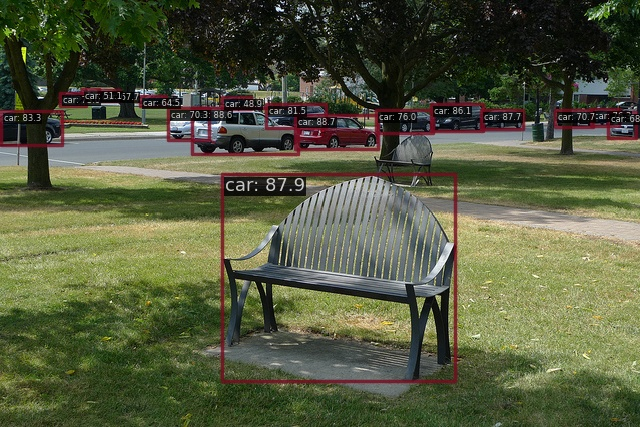

In [27]:

# Show the output image
from PIL import Image
Image.open('./output/vis/demo.jpg')

In [28]:
img = '../radar/datasets/test/test_open_0.png'
result = inferencer(img, out_dir='./output')

Output()

In [29]:
# min_x, min_y, max_x, max_y = result['predictions'][0]["bboxes"][0]
# min_x

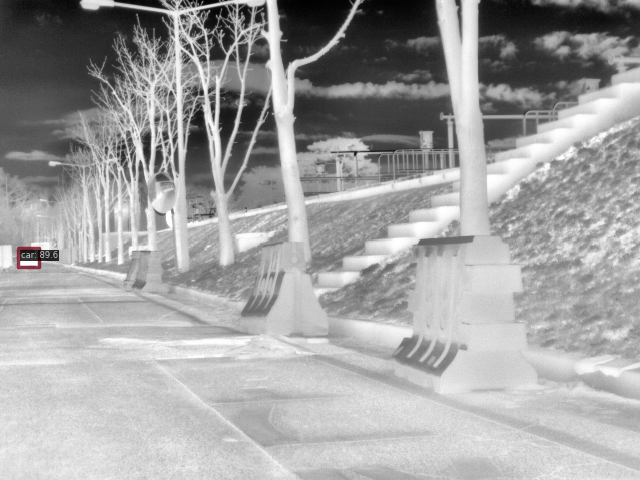

In [30]:
from PIL import Image
Image.open('./output/vis/test_open_0.png')

In [31]:
# !python tools/misc/download_dataset.py --dataset-name balloon --save-dir data --unzip


In [32]:
# # import json
# with open('../radar/datasets/anno/train.json', 'r') as file:
#     data = json.load(file)

# # # Now 'data' is a Python dictionary containing the JSON data
# # print(data)

In [33]:
# data.keys()

In [34]:
# !python tools/train.py projects/CO-DETR/configs/codino/co_dino_5scale_swin_l_16xb1_16e_custom.py

In [35]:
##test

# {
#       'predictions' : [
#         # Each instance corresponds to an input image
#         {
#           'labels': [...],  # int list of length (N, )
#           'scores': [...],  # float list of length (N, )
#           'bboxes': [...],  # 2d list of shape (N, 4), format: [min_x, min_y, max_x, max_y]
#         },
#         ...
#       ],
#       'visualization' : [
#         array(..., dtype=uint8),
#       ]
#   }

# [

# {

# "image_id" : 이미지 구분자,

# "category_id" : 객체 클래스 구분자,

# "bbox" : [

# 좌상단 x 좌표(pixel),

# 좌상단 y 좌표(pixel),

# bbox의 width(pixel),

# bbox의 height(pixel)

# ],

# "score" : Confidence Score,

# "segmentation" : []

# },

# {

# ...

# },

# ...

# ]

In [36]:
# a,b,c,d = result['predictions'][0]["bboxes"][0]
# a
# result['predictions'][0]["bboxes"][0]

In [37]:
# # !pip install natsort
# import matplotlib.pyplot as plt
# from PIL import Image, ImageDraw

# min_x,min_y,width,height=[17.932376861572266, 248.2184600830078, 21.222991943359375, 19.119918823242188]
# # image_path = 'path_to_your_image.jpg'  
# image_path = '../radar/datasets/test/test_open_0.png'

# # Replace with the path to your image
# image = Image.open(image_path)

# # Bounding box coordinates
# # min_x = 50
# # min_y = 30
# # width = 100
# # height = 60

# # Create a draw object
# draw = ImageDraw.Draw(image)

# # Draw the bounding box
# draw.rectangle([min_x, min_y, min_x + width, min_y + height], outline='red', width=3)

# # Display the image with the bounding box
# plt.imshow(image)
# plt.axis('off')  # Hide the axis
# plt.show()

In [38]:
from natsort import natsorted

val_dir_prefix = "../radar/datasets/val/"
images = os.listdir(val_dir_prefix)
sorted_images = natsorted(images)
# sorted_images
sorted_images[0].split(".")[0]

'val'

In [40]:
import json
# sub_results = []

# n=0
a=0
for image_dir in sorted_images:
#     print(os.path.join(val_dir_prefix,image_dir))
    if image_dir.split(".")[-1] == "json":
        continue
    result = inferencer(os.path.join(val_dir_prefix,image_dir))
    obj_num = len(result['predictions'][0]["labels"])
    for idx in range(obj_num):
        if result['predictions'][0]["scores"][idx] < 0.1:
            continue
        if result['predictions'][0]["labels"][idx] > 8:
            print(result['predictions'][0]["labels"][idx])
            print(image_dir)
            a=1
            break
    if a==1:
        break

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

In [41]:
from natsort import natsorted

test_dir_prefix = "../radar/datasets/test/"
images = os.listdir(test_dir_prefix)
sorted_images = natsorted(images)
# sorted_images
sorted_images[0].split(".")[0]

'test_open_0'

In [42]:
import json
sub_results = []

# n=0
for image_dir in sorted_images:
    result = inferencer(os.path.join(test_dir_prefix,image_dir))
    obj_num = len(result['predictions'][0]["labels"])
    for idx in range(obj_num):
#         if result['predictions'][0]["scores"][idx] < 0.1:
#             continue
        if result['predictions'][0]["labels"][idx] > 8:
            print(result['predictions'][0]["labels"][idx])

Output()

Output()

67
64
54
74
18
29
72
41
26
75


Output()

64
67
10
72
26
70
29
56
24
54
19
55
74
58
39
52
75
62
11
58
15
41
47
12
35
18
17
68
65
76
40
62
78
20
46
73
43
16
34
63
9
44
50
23
36
66
21
33
60
51
38
69
41
25
31
57
53
22
73
30
13


Output()

46
21
73
70
17
23
35
16
51
55
56
50
66
71
33
53
47
48
25
69
77
31
15
72
18
19
59
61
74
58
29
12
49
67
79
54
60
36
76
15
20
32
24


Output()

58
62
11
60
13
41
73
25
72
56
67
72


Output()

67
74
64
10
19
65
56
52
55
29
15
26
11
18
54
24
9
57
72
58
51
62
16
43
47
36
41


Output()

41
60
13
25
16
58
11
49
21
26
12
67
51
33
20
71
45
73
56


Output()

67
74
64
11
26
72
56
19
55
24
10
52
65
54
39
15
43
58
29
73


Output()

54
64
26
17
24
46
70
67
19
55
56
62
15
12
35
44
75
10
58
72
39
76
11
66
78
63
52
40
18
30
74
29
47
16
36
43
41
68
50
34
23
73
21
69
65
51
38
22
20
71
14
57
42
53
48
62
45
9
79
61
33
31
60
25
58
60
13
28
77
59
27


Output()

58
11


Output()

67
58


Output()

Output()

64
67
74
56
26
10
15
24
29
72
19
39
54
65
52
55
76
58
51
58
18
9
75


Output()

64
67
26
10
74
72
56
15
24
29
19
39
58
54
55
70
12
62
76
52
35
68
18
75
41
65
9
50
11
47
51
16
78
17
73
43
57
38
44
66
33
63
46
31
36
21
23
20
69
34
40
53
22
28


Output()

26
64
24
15
17
54
70
10
67
72
39
56
12
75
35
19
58
55
46
74
18
62
76
44
23
52
40
78
16
63
11
47
41
68
36
34
66
30
43
29
38
51
22
65
73
50
69
53
20
21
14
9
57
42
71
48
61
79
31
28
33
13
59
77
45
58
27
25


Output()

11
58
51
65
18
57
13


Output()

67
64
74
72
54
55
19
26
29
65
15
58
56
52
10
39
24
62
11
70
41
43
44
12
47
40
58
66
36
68
18
17
73
16
75


Output()

11
52
51
19
58
74
65
56
67
55


Output()

Output()

Output()

41
20
72
68
18
39
40
44
51
76
36
70
16
53
49
74
46
48
15
54
65
22
45
75
55
59
43
63
19
47
69
67
64
71
52
42
23
58
60
50
66
77
17
11
78
31
21
62
57
24
79
28
73
35
27
33
56
29
14
38
10
61
30
34
9
25
12
13
26
32
37


Output()

58
60


Output()

Output()

Output()

Output()

Output()

Output()

Output()

11


Output()

Output()

Output()

Output()

Output()

26
64
10
46
11
35
70
54
63
17
75
12
62
76
24
67


Output()

25
68
69
50
62
56
78
58
19
64
28
59
43
71
72
57
12
60
35
17
49
44
21
77
40
16
73
51
67
63
38
56
26
42
13
24
47
22
45
20
27
66
14
55
9
64
34
15
41
46
54
37
11
43
30
19
52
33


Output()

Output()

20
51
16
53
70
49
69
35
41
77
72
18
15
68
45
46
55
26
22
76
36
44
43


Output()

Output()

Output()

Output()

Output()

54
56
64
19
62
43
67
15
55
24
52
46
44
66
17
69
68
21
40
76
26
34
65
50
72
63
60
70
35
14
75
57
30
51
71
18
16
42
58
41
74
36
47
29
12
78
11
39
53
45
10
22
20
48
25
73
38
31
27


Output()

Output()

Output()

Output()

Output()

Output()

35
76
24


Output()

Output()

Output()

Output()

76
67
11
64
58
26
29


Output()

Output()

64
26
35
35
62
26
64
72
67
10
72
70
19
10
67
63
76
55
24
46
70
54
19
11
73
18
74
50
62
18
17
44


Output()

64
26
35
19
54
46
10
44
70
64
72
17
76
67
62
72
24
26
55
47
67
75
35
11
74
56
23
54
19
10
58
18
18
22
73
24
50


Output()

64
67
72
35
29
26
10
76
70
19
44
24
65
39
54
55
17
74
75
34
58
62
47
12
56
46
40
63
23
78
18
41
15
11
20
66
52
16
67
36
73
29
30
38
51
68
43
72


Output()

64
26
35
67
72
70
10
76
39
29
19
24
44
55
17
23
78
58
74
46
11
12
47
34
54
75
62
41
18
65
66
56
63
38
15
20
16
36
52
40
22
51
43
73
68
30
9
31


Output()

11
64
76
26
10
58
35
67
72
70
44
23
15
39
78
65
46
66


Output()

64
26
70
35
67
76
10
46
11
17
11
63
55
12
72
54
24
47
19
62
78
44
75
39
62
34
36
18
29
41
52


Output()

Output()

Output()

Output()

Output()

59
21
70
17
55
69


Output()

Output()

Output()

64
35
24
21


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

10
54
64
26
35
17
76
70
46
67
24
19
15
12
62
63
55
47
44
72
18
52
30
39
75
16
36
11
74
68
78
29
23
43
56
41
34
73
40
58
50
48
66
22
20
53
69
21
42
38
65
51
14
71
9
79
61
77
31
33
57
28
59
45
67


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

13
71
58
11


Output()

64


Output()

68
62
9
58
57
71
39
28
13
70
23
22
25
55
69
11
73
12
64
35
49
65
74
10
35


Output()

Output()

Output()

Output()

Output()

35
17
65
71
18
20
48
73
69
63
66
60
59
64
70
68
76
42
55
30
56
9
40
78
72
46
19
21
62
43
47
32
61
79
31
53
15
33
34
22
51
77
44
36
74
25
57
16
23
41
12
50
49
37
14
38
10


Output()

19
64
54
35
26
67
76
24
26
67
10
46
54
19
17
64
70
56
62
35
62
55
10
15
63
12
63
47
24
50
56


Output()

72
70
69
37


Output()

64


Output()

32
45
11
18
58
16
74
11
12
14
36
41
9
19
74
16
13
21
72
61
51
57
19
33
53
10
9
55
75
77
57
51


Output()

Output()

Output()

35


Output()

56
38
58


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

47
67
64
45
56
26
14
53
11
51
59
13
71
42
51
65
20
76
63
13
32
35
62
58
60
28
41
44
43
57
57
16
73
29
31
18
29
10
50
66
73
62
33
56
36
46
38
18


Output()

Output()

25


Output()

25


Output()

25


Output()

Output()

Output()

76
35
20
48
59
40
56
43


Output()

35
48
20
76
76


Output()

Output()

Output()

Output()

76
35
56
20
48
40
46
63
44
60
17
18
66
30
15
59
43
65
71
47
41
42
68
16
69
64
12
73
31
62
21
61
79
14
36
72
55
53
51
19
9
78
32
70
38
50
22
37
33
24
74
57
49
25
77
27
39
34
52
10


Output()

18
53
51
39
72
20
79
10
55
77
16
45
15
23
41


Output()

Output()

Output()

Output()

46
73


Output()

Output()

Output()

35
64
21
15
48
24
75
40
41
10
58
76
18
56
73
17
78
16
55
68
19
72
70
43
79
14
49
22
32
53
69
64
29
30
38
45
42
15
50
61
20
39
33
56
26
19
60
59
47
56
44
50
64
62
27
19
46
21
31
77
66
26
67
72
70
54
46
34
26
15
63
76
11
75
29
12
73
18
67
24
52
66
54
51
17
74
11
9
28
58
75


Output()

Output()

Output()

35
46
15
16
73
55
77
51
20
61
70
53


Output()

35
16
15
77
55
35


Output()

24
24
24
35
35
26
26
17
48
38
27
38
35
27
48
17
77
19
26
16
76
14
43
76
56
46
15
53
34
14
77
19
56
34
46
16
42
48
17
25
70
32
53
21
37
51
73
54
38
23
66
71
32
73
31
43
15
52
28
69
37
31
50
33
51
18
54
25
78
70
39
45
42
16
27
64
29
71
46
29
74
66
52
77
21
28
30
45
12
13
23
78
19
39
33
30
76
22
53
9
62
14
68
13
58
18
69
15
64
25
55
34
74


Output()

Output()

47
14
47
67
76
67
14
64
35
35
45
53
26
56
64
35
26
53
51
29
56
15
73
42
41
51
32
45


Output()

20


Output()

Output()

Output()

Output()

64
10
26
72
70
39
35
24
67
15
55
12
29
75
76
62
78
46
44
17
19
47
54
23
56
63
58
52
36
18
74
34
68
40
41
11
16
65
50
38
30
66
22
73
51
20
43
53
69
21
48
9
31
33
11
61
57
28
79
14
58
77


Output()

35
63
34
65
17
64
62
78
66
20
21
56
46
32
73
30
60
59
55
69
68
51
76
18
48
44
71
79
40
14
9
72
61
33
43
70
19
22
15
42
25
74
31
37
49
16
38
47
77
36
53
27
41
12
50
23
57
29
13
10
58
54
52
24
45
75
39
28
67
11
26


Output()

Output()

26
35
64
70
10
17
67
55
62
46
19
72
18
24
76
78
47
23
73
11
54
44
63
39
15
12
75
66
22
50
56
64
43
58
65
72
29
74
52
36
41
67
16
38
30
68
51


Output()

Output()

21
35
75
41
64
40
76
24
10
14
49
18
15
56
43
48
79
17
62
73
25
68
72
55
39
68
30
58
70
22
54
29
61
42
16
11
69
20
78
33
12
35
57
27
34
46
19
45
31
47
32
38
52
49
58
13


Output()

19
35
64
24
26
76
54
46
56
70
15
26
17
10
67
63
62
42
69
12
56
10
35


Output()

Output()

20


Output()

35
17
64
21
15
56
75
40
18
10
24
70
22
72
48
16
41
73
14
55
78
79
43
58
49
53
29
68
30
69
76
61
38
33
59
42
60
50
20
39
27
32
12
9
34
45
31
46
44
19
28
26
77
13
11
51
47
23
66
74
54
52
57
37
65
63
36
62
25
13
11
56
67
49
71
25
60
51
16
41
12
19
26
21
9
28
33
62
58
57
38
17
40
73
45
34
67
43
78
74
68
23
50
14
29
18


Output()

Output()

64
19
67
35
24
54
26
46
70
56
76
15
47
62
10
43
55
17
69


Output()

24
64
35
21
19
56
15
75
69
18
43
58
72
16
59
14
17
22
40
42
50
28
10
78
48
33
26
55
41
20
73
52
68
77
56
51
70
30
39
60
11
38
27
76
13
49
54
19
12
45
53
46
66
61
57
74
79
37
24
25
34
44
64
29
15
47
32
23
31
63
9
62
43
52
36


Output()

Output()

Output()

Output()

21
66
16
11
38
41
12
14
77
70
75
71
58
79
34
19
63
40
48
35
18
64
42
10
26
62
25
68
24
39
57
20
54
76
9
55


Output()

64
54
56
19
24
67
17
15
26
43
62
74
35
55
70
76
18
72
11
46
66
52
10
44
39
12
47
73
63
30
78
21
16
40
69
58
75
41
51
65
22
68
42
14
29
53
57
36
50
34
20
61
23
38
60
31
48
33
79
59
9
27
71
45
25
13
77
28
49


Output()

64
26
54
17
24
70
76
15
67
19
46
35
10
55
62
56
78
72
44
63
74
47
12
40
43
18
75
39
66
68
30
11
73
16
41
58
36
52
29
22
65
20
23
50
69
34
51
57
21
38
14
42
71
53
61
48
60
9
31
79
33
28
45
59
13
77
25
27


Output()

54
58
67
73
74


Output()

64
26
54
17
15
46
10
24
70
19
67
76
35
55
44
30
12
63
78
39
56
75
47
62
40
72
36
52
66
74
58
16
23
11
18
41
73
43
22
68
29
65
38
34
50
20
69
51
48
71
53
21
57
42
61
14
9
79
60
31
33
28
13
45
77
59
25


Output()

64
26
54
10
15
24
70
17
67
39
46
35
19
75
72
76
62
55
40
12
58
63
56
47
78
30
52
74
11
44
36
29
22
23
66
43
68
65
18
73
16
41
34
69
38
53
50
20
51
9
21
57
14
31
71
33
48
79
61
42
28
60
13
59
77


Output()

17
70
54
15
64
26
62
12
19
46
24
76
35
78
55
40
44
41
67
39
10
58
72
16
56
18
36
63
68
52
30
23
75
11
47
29
66
48
50
74
43
22
38
21
69
20
65
34
71
51
53
42
73
14
45
61
57
79
77
33
9
31
28
25
27
59
60
49
13
37


Output()

54
64
17
15
19
76
46
24
70
67
55
40
26
62
35
56
44
47
43
78
41
12
65
30
18
63
66
52
68
10
39
72
16
36
29
58
74
69
34
20
42
73
50
75
22
21
57
71
51
14
53
11
23
38
79
60
48
31
45
61
9
59
13
77
28
27
25
33
49


Output()

17
64
54
15
26
70
24
35
10
63
46
62
67
19
30
56
76
52
44
55
78
16
72
36
75
12
40
74
68
47
39
18
29
66
43
73
11
41
34
65
20
50
22
58
69
48
23
42
71
38
51
21
14
53
57
31
45
61
79
60
59
33
13
9
28
27
77
25
49


Output()

26
47
67
14
45
56
53


Output()

47
14
67
64
56
26
53
45
28
51
32
59
62
13
71
42
76
50
20
31
73
41
24
16
39
12
63
30
57


Output()

Output()

9
11
21
62


Output()

Output()

Output()

24
43


Output()

Output()

13
11


Output()

Output()

Output()

Output()

77
35
16
51
15
55
18
46
58
45
53
73
32
26
45
49
47
48
57
67
61
41
64
70
50
54
76
52
43
24
28
56
13
39
14
14
59
75
66
26
28
59
29


Output()

Output()

Output()

Output()

64
26
72
54
24
39
10
15
17
70
67
35
19
62
75
74
56
12
58
76
47
44
18
46
78
55
29
68
52
40
11
23
65
63
16
41
30
22
66
34
36
38
43
73
9
20
51
50
21
69
14
33
57
48
53
31
79
61
71
42
28
77
13
49
27


Output()

Output()

Output()

68
62
9
74
11
70
28


Output()

Output()

Output()

Output()

Output()

16


Output()

Output()

Output()

64
67
36


Output()

Output()

Output()

70
72
11
69
37
75
16
55
41
74
58
68
40
43
31
23
36
48
20
10
32
24
33
57
29
9
76
18
52
28
49
60
53
77
71
17
56
22


Output()

Output()

64
26
67
10
72
54
75
24
39
70
55
17
35
62
40
15
12
46
29
56
74
19
76
47
58
44
52
11
68
78
65
63
41
34
62
18
66
30
43
58
16
36
69
73
50
38
23
22
9
38
21
53
51
57
47
20
14
31
41
71
58
48
73
25
33


Output()

64
56
17
26
67
24
19
70
35
63
54
75
62
55
76
46
44
18
78
72
41
29
40
12
50
66
74
47
36
11
39
16
52
68
10
34
15
21
58
20
30
43
69
73
65
48
42
23
51
45
22
38
57
71
61
77
14
28
53
33
31
9
79
25
59


Output()

26
10
64
17
54
24
70
46
75
67
72
39
11
12
63
56
29
35
55
62
52
47
16
36
78
18
68
30
58
19
20
76
74
44
34
15
73
66
41
40
50
23
33
21
43
48
22
51
14
69
57
65
53
38
31
61
9
28
71
45
13
77
79
42
59
60
49
25


Output()

64
26
72
67
56
29
62
10
54
35
24
17
75
70
19
63
55
78


Output()

74
11
19
37
36
33
11
16
74
58
31
29
54
68
10
9
41
75
24
36
43
38
26
18
58
16
22
23
73
53
57
25
13
45
55
76
17
47
9
65


Output()

35
64
15
24
75
76
17
43
21
10
18
40
48
70
16
41
53
73
56
68
58
72
22
49
55
33
39
20
29
78
14
30
59
61
79
69
45
47
32
31
52
42
54
26
50
56
60
27
46
19
38
28
19
11
12
51
9
13
44
74
77
64
34
23
66
65
37
21
72
66
57
65
12
43
15
62
18
36
52
26
67
70
50
60
24
51
55
44
29
63
11
46
67
62
36
16
17
57
69
41
63
58
42
25
35
78
38
23
74
71
73
30
34
54
71
68
75
47
27
76
45
48
40
79
77
53
33
14
31
13
22
25
10
9
20
59
39


Output()

35
75
64
40


Output()

Output()

Output()

14
45
73
73
41
67
14
10


Output()

Output()

Output()

Output()

Output()

Output()

Output()

64
65
15
19
67
72
10
35
76
29
56
62
54
24
26
44
55
39
26


Output()

Output()

Output()

Output()

Output()

Output()

24
43


Output()

Output()

Output()

Output()

Output()

Output()

47
67
26
45
56
64
14
59
13
20
28
53
42
76
51
41
32
16
71
63
62
54
73
24
50
31
18
27
57
12


Output()

Output()

64
26
56
54
24
67
17
55
70
10
72
19
62
15
35
29
75
46
18
52
40
12
63
39
78
68
74
66
58
65
43
11
76
47
57
50
16
44
36
73
41
30
69
21
34
38
20
51
23
9
28
33
71
45
22
53
31
48
13
14
42
61
59
25
79
27


Output()

67
64
11
56
43
54


Output()

64
67
10
56
54
55
26
18
74
43
62
19
72
52
11
73
29
15
50


Output()

16
21
41
66
14
38
17
11
75
35
17
46
19
66
40
30
77
70
21
9
68
48
73
34
10
26
30
57
66
24
48


Output()

35
15
64
24
21
17
48
18
22
40
68
43
58
16
78
70
56
72
55
10
69
59
76
14
73
42
30
79
75
41
20
53
60
49
19
61
66
33
29
38
50
44
39
27
77
12
46
51
28
32
45
31
52
47
13
9
26
34
54
23
57
74
11
37
63
65
36
25
71
62
67


Output()

Output()

17
26
15
64
39
56
24
67
54
19
70
72
35
55
62
74
40
10
12
76
18
41
78
44
66
68
46
75
63
43
65
58
23
16
29
52
38
73
69
47
34
51
36
22
11
30
20
21
50
42
53
48
79
9
57
61
33
71
14
31
28
25
77
27
13


Output()

Output()

Output()

15
54
26
17
24
19
56
67
64
35
46
10
70
76
42
62
26
63
15
54
75
74
17
52
55
16
64
56
35
19
24
40
18
42
78
67
10
12
66
72
68
62
53
41
36
39
23
63
73
46
69
43
75
70
76
52
20
58
11
30
47
16
50
44
74
48
38
55
29
18
34
61
59
21
72
22
65
41
51
12
50
68
69
66
78
36
71
73
40
29
44
57
30
53
77
11
13
20
43
48
14
39
47
23
58
21
59
60
38
27
9
33
31
71
57
28
34
65
22
25
13
79
61
45
51
33
45
14
60
27
31
77
25
9
37
28


Output()

62
62
25


Output()

67
26
64


Output()

Output()

Output()

Output()

Output()

Output()

35
35
64
24
64
24
76
76
48
75
48
75
43
41
15
43
41
21
21
15
68
69
10
68
58
69
10
58
56
40
73
55
49
18
72
22
72
56
73
40
55
54
49
18
14
16
30
22
42
14
17
30
54


Output()

76
64
70
35
46
26
19
54
26
64
26


Output()

Output()

Output()

Output()

11
16
13


Output()

19
28
24
57
59
13
28
19
56
57
9
10
43
52
24
35


Output()

Output()

Output()

Output()

Output()

35
21
66
17
30
73
71
26
25
46
10
67
48
55
70
54
70
35
60
64
29
72
34
22
24
17
40
56
46
47
69
55
72
39
16
76
31
12
78
65
76
57
34
77
59
19
50
75
58
58
11
38
68
19
40
32
41
33
18
62
56
43
21
51
47
64
36
35
52
66
36
41
17
23
79
18
64
37
44
20
61


Output()

26
10
17
70
54
46
67
35
64
72
26
24
64
56
72
56
55
12
24
15
63
17
54
76
62
19
39
75
23
78
11
16
47
75
36
10
58
29
67
35
70
19
30
18
52
41
62
68
55
34
66
18
40
73
44
74
63
39
46
74
20
12
43
52
68
15
58
53
40
29
76
50
41
38
22
78
48
69
51
50
66
44
33
21
11
34
16
47
73
65
42
36
30
21
23
31
20
43
61
65
9
69
14
71
51
79
22
38
13
77
42
57
28
48
33
59
57
71
9
53
25
60
28
61
27
45


Output()

26
72
56
67
24
15
39
64
10
74
19
75
40
54
53
17
47
29
76
17
58
70
52
35
41
16
62
43
69
55
68
12
56
63
78
34
23
11
18
38
36
46
20
41
9
45
33
31
49
73
65
42
14
44
51
22
61
66
58


Output()

11
67
11
62
19
72
55
65
64
13
29
54
10
58


Output()

16
21
75
41
32
64
53
48
76
50
77
18
70
37
38
14
19
20
24
11
54
29
42
51
35
63
34
10
44
58
31
72
17
57
68
15
62
26
45
36
60
79
33
73
66
55
56
12
71
30
40
28
47
13
49
39
65
46
23
64
67
67
43
9
27
74
72
19
25
24
56
17
52
40
35
70
39
55
54
18
34
44
26
29
65
62
12
76
74
63
75
10
15
43
68
41
52
59
66
47
78
69
46
36
58
20
11
16
9
42
14
22
21
23
51
30
50
57
31
73
22
53
38
79


Output()

Output()

75
35
21
64
10
40
35
64
76
76
24
24
41
56
70
15
79
43
29
73
49
55
30
48
18
17
72
53
14
15
58
39
43
21
68
61
22
48
41
33
78
38
16
46
14
58
75
20
32
73
45
69
11


Output()

25
41
16
26
33
11
21
58
62
77
58
54
51
49
67
17
66
12


Output()

72
26
64
39
70
67
29
24
10
75
12
35
54
56
40
76
58
17
55
41
46
19
78
11
34
47
20
36
52
16
68
18
44
74
62
63
15
43
66
65
23
33
30
69
9


Output()

26
64
10
62
29
67
55
36
35
70
65
46
72
54
78
19
11
17
76
73
47
56
18
58
75
63
43


Output()

64


Output()

Output()

67
58


Output()

Output()

Output()

58
17
73
25
78
26
75
56
74
15
13
14
15
40
47
56
26
43
38
67
16
46
45
35
22
24
19
65
62
77
71
72
76
64
41
39
60
27
74
72
19
51
33
58
9
10
28
52
24
50
51
49
18
11
43
23
57
70
65
54
39
16
31
17
73
75
70
36
55
62
69


Output()

24
64
35
43
76
19
48
59
15
69
26
27
68
50
56
45
42
54


Output()

Output()

Output()

11
74
36
33
10
58
16
31
9
13
75
26
23
29
18
24
37
73
38
28
57
72
41
19
17
70
32
68
45
25
53
51
47
22
15
62
67
54
39
60
52
71
56
20
12
55


Output()

67
64
56
19
24
58
54


Output()

Output()

Output()

71
35
70
48
66
17
69
59
66
48
25
55
21
35
21
70
30
30
60
17
73
55
68
65
32
78
69
72
72
46
60
32
20
34
57
33
56
62
34
71
18
25
65
59
64
16
56


Output()

Output()

Output()

24
19
26
17
28
58
16


Output()

Output()

Output()

67
56
74
43
15
26
64
10
24
72
65
19
75
25
52
18
66
57
51
73
62
54
76
36
56
39
29
31
55
70
42
69
11
21
17
23
35
58
38
50
53
41
78
9
16
13
63
60
13
22
12
26
68
40


Output()

Output()

Output()

13
54
19
11
51
49
11
58


Output()

26
35
70
64
62
67
54
19
15
17
46
24
10
55
56
78
66
63
76
44
74
50
72
36
73
12
18
75
47
52
41
68
43
16
23
29
58
65
42
39
30
69
11
51
71
40
48
34
20


Output()

Output()

64
67
15
26
54
56
10
52
55
17
24
72
68
74
43
63
35
62
40
57
70
19
69
36
46
75
30
29
41
12
16
47
78
65
76
53
66
44
71
18
39
60
73
50
31
34
13
58
11
42
38
20
22
9
51
59
21
48
28
45
61
14
33
23
27
25
37
79


Output()

67
26
56
64
11
29
10
54
62
55
65
19
73
72
58
75
17
52
33
74
18
47
78
43
51
36
68
57
41
16
70
24
50
15
9
31
46
76
63
21
66
39
40
20
23
13
12


Output()

Output()

Output()

Output()

26
45
67
41
20
56
12
14
47
13
16
59
10
63
27
28
64
42
71
29
32


Output()

Output()

64
56
54
67
26
15
24
17
43
55
63
69
74
35
62
46
52
50
19
70
57
60
16
76
72
53
10
30
18
75
66
40
68
44
11
29
14
42
71
34
58
73
41
21
51
12
20
13
47
78
65
36
59
45
31
22
39
38
33


Output()

64
15
56
54
67
24
17
40
69
35
55
19
26
68
63
52
43
30
76
75
62
44
46
70
42
72
74
65
57
53
66
10
41
34
50
71
78
17
16
47
58
38
51
39
18
25
25
21
36
73
60
57
17
29
22
47
31


Output()

13
19
11
51
28
16
58
54
75
33
52
57
21
56
18


Output()

26
64
72
67
10
35
76
24
54
19
70
17
56
75
46
63
15
39
74
44
34
12
29


Output()

Output()

Output()

Output()

56
17
26
54
64
15
67
62
19
24
46
70
78
12
35
76
55
52
68
63
41
72
75
66
40
16
10
69
44
39
74
58
43
50
21
30
29
36
18
71
47
42
34
11
73
51
20
38
23
65
57
22
53
14
45
48
59
61
28
33
27
60
31
77
13
9
25
79


Output()

45
26
56
14
64
67
47
13
53
51
63
20
24
42
76
62
59
16
60
28
32
41
57
27
50
43
54
71
44
18
31
66
29
52
12
48
73
75
38
58
30
10


Output()

74
11
19
33
16
31
37
58
36
9
75
68
23
54
17
24
38
41
43
29
18
20
13
10
25
22
56
70
57
47
76
51
73
45
26
60
53
55
40
49
72
69
52
65
21
32
71
28
62
50
48
30
15
67
35
59
78
27
77
61
39
14


Output()

67


Output()

70
57
37
31
75
17
59
33
68
36
11
28
69
72
55
60
43
52
20
71
16
74
77
50
23
73
49
10
58
18
56
62
9
22
53
40
78
61
21
47
48
32
51
15
19
29
13
24
38
45
65
25
41
66
30
67
39
12
46
35
26
27
76
63


Output()

26
46
67
13


Output()

73
36
25
16
58
55
47
58
57
17
72
73
77
12
77
59
70
45
17


Output()

31
70
43
37
32
36
60
55
29
73
35
48
53
68
72


Output()

67
64
26
54
56
24
10
15
74
72
17
19
41
35
55
70
39
62
52
18
68
16
76
75
12
40
29
63
78
11
46
43
47
58
38
73
65
69
34
44
23
66
53
9
51
57
42
30
22
36
21
20
31
33
13
48
50
61
71
28
60
27
59
14
25
77
79
45


Output()

26
15
56
24
67
17
64
72
70
19
10
54
39
58
12
62
74
75
68
52
55
69
23
40
18
46
78
35
38
16
63
41
43
76
51
42
13
57
66
11
36
22
34
53
73
65
47
50
44
28
9
29
30
61
71
20
21
31
59
60
48
33
77
27
45
25
79
14


Output()

Output()

67
26
13


Output()

Output()

Output()

36
31
37
70
31
55
48
41
36
43
68
74
11
75
32
72
29
70
24
33
52
74
60
43
16
10
37
71
53
57
26


Output()

Output()

35
48
17
66
71
30
73
21
70
55
25
69
59
38
60
43
37
74
56
34
62
46
76
33
77
19
22
42
65
31
32
50


Output()

35
64
15
17
21
24
10
40
22
58
18
75
56
72
70
68
78
48
16
14
33
30
43
69
73
49
41
53
29
79
55
76
38
20
42
39
59
50
27
61
60
12
19
26
11
45
46
31
32
13
52
34
51
44
9
54
66
28
23
47
77
74
57
37
65
25
36
63
62
67
71


Output()

41
20
72
79
51
45
34
18
15
77
64
55
39
66
50
76
73
68
46
23
44
70
53
65
46
49
21
16
54
10
27
74
12
22
59
67
60
17
75
43
32
35
36
52
14
63
57
48
71
78
35
26
61
19
25
13
47
29
16
47
40
55
15
33
11


Output()

13
56
26
67
17
45
58
40
16
51
14
19
28
57
63
47
25
60
13
28
49


Output()

13


Output()

60
25
71
60
63
69
68
57
13
28
35
40
43
62
59
66
11
58
46
34
70
73
55
9
49
20
78
38
22
72
56
36
17
23
51
12
77
16
19
50
67
33
64
52
65
67
53
71
44
74
56
37
64
25
60
79
21
26
24
42
61
14
54
10
47
66
71
48
29
13
19
35
31
69
62
73
55
45
57
39
72
59
18
57
28
15
63
74
26
46
58
25
68
43
68
18
76
17
72
43
46
40
40
35
70
55
40
35
13
66
49
41
52
73
62
54
68
39
30
16
20
24
69
43
65
46
17
70
27
47
75
10
15
29
55
51
78
44
47
72
11
11
76
41


Output()

45
20
18
10
23
55
73
79
16
77
15
39
72
51
34
50
41
64
32
70
13
58
17
53
68
75
54
26
22
21
49
14
19
74
66
65
12
78
59
11
57
60
35
27
25
46
61
52
43
24


Output()

16
15
10
77
50
17
23
26
18
45
27
32
14
21
51
24
73
33
53
41
54
39
13
34
68
71
20
79
55
48
75
19
58
66
64
57
25
52
74
12
67
59
22
60
72
35
61
44
76
70
16
49
65
28
78
77
47
16
24
42
29
11
46
32
43
26
73
9
35
10
62
34
26
15
41
38
79
17
39
18
10
27
39
18
31
56
45
12
36
45
69


Output()

26
67
45
13
14
63
52
56
28
27
76
24
59


Output()

26
67
45
26
14
56
13
47
73
28
59


Output()

Output()

47
56
26
67
64
45
14
53
59
20
51
13
42
32
28
76
62
71
16
41
35
24
50
63
54
18
31
73
12
57
43
58
60
38
27
26
44
29
66
48
55
35
30
73
39
10
38
40
73
75
29
52


Output()

64
54
56
67
43
52
15
24
26
57
65
75
40
74
76
55
19
17
69
72
39
68
51
35
44
66
10
78
70
38
18
12
46
62
63
28
50
9
16
34
14
21
30
41
36
71
58
60
31
29
73
13
47
22
42
11


Output()

15


Output()

Output()

Output()

67
64
19
56
29
65
15
52
72
10
24
26
54
55
43
74


Output()

Output()

Output()

Output()

56
64
67
26
54
19
55
65
43
73
15
24
17
62
57
60
52
66
29
36
63
16
10
78
72
50
51
70
46
58
47
68
74
69
11
30
75
33
31
13
40
20
76
35
18
21
53
44
71


Output()

26
72
67
56
75
10
24
39
15
54
74
64
29
62
52
19
53
16
70
11
43
36
76
17
34


Output()

35
25
17
30
71
66
73
48
46
24
55
21
60
25
26
28
34
38
19
35
35
70
56
40
69
17
73
56
62
76
45
71
30
48
46
49
27
65
43
66
59


Output()

Output()

56
26
19
54
64
24
17
15
67
52
62
70
72
43
75
55
40
68
35
63
10
29
74
69
76
46


Output()

Output()

75
65
58
74
72
71
43
33
55
67
16
57
73
26
25
36
17
52
12
41
60


Output()

26
64
67
10
72
24
54
17
70
39
56
15
29
55
19
18
12
35
47
52
16
41
68
74
58
62
46
11
75
78
76
40
36
43
66
20
73
63
23
44
30
34
65
51
13
69
22
38
33
31
50
9
53
57
21
48
71
60
61
28
45
79
42
14


Output()

67
64
26
29
72
39
56
24
65
10
19
18
75
54
55
76
15
40
41
74
62
70
17


Output()

11
74
51
58
13
65
52
16
58
9
10
54
57
36
33
23
60
19
18
73
29
15
75
38
67
22
62
56
55
53
21
43
27
17
75
16
68
31
50
24
32
36
72
38
59
77
26
41
47
78
45
49
66
76
71


Output()

Output()

24
35
75
21
64
43
15
69
58
10
18
19
56
40
76
59
48
41
17
16
42
73
55
72
68
33
39
14
49
53
26
22
30
52
38
78
51
20
54
13
50
45
70
27
47
60
74
28
29
11
77
19
64
79
56
46
31
61
12
15
44
37
24
25
9
32
66
23
34
57
67
40
72
57
43
75
18
65
65
52
74
69
26
63
36
71
54
67
17
62
76
70
29


Output()

58
75
16
26
56
71
17
19
24
13
60
65
36
12
40
38
62
25
41
73
29
47
45
74
43
21
53
76
11
28
72
54
52
9
57
18
15
34
78
10
51
31
67
35
37
64
55
20
46
33
30
23
22
50
14
63
77
69
66
49
39
59


Output()

64
35
24
58
21
69
48
17
53
50
33
43
20
75
41
72
15
73
42
68
59
16
10
22
70
14
40
55
18
56
19
78
49
51
76
38
77
45
60
30
47
29
39
23
26
74
11
27
31
32
52
25
46
37
28
79
44
66
12
13
54
9
34
61
62
57
65
71
63
36


Output()

58
62
25
11
73
12
13
41
17
72
71
47
18
9
56
57
50
60
21
16
40
68
66
77
33
26
78
23
55
22
49
51
14
32
20
65
28
75
79
74
70
45
67
37
38


Output()

Output()

24


Output()

26
56
15
39
72
67
24
64
19
54
17
40
70
74
23
10
58
38
75
12
35
55
52
76
34
43
69
62
41
16
78
53
63
68
46
44
29
66
65
36
11
42
18
51
22
9
73


Output()

64
56
15
24
54
67
26
35
17
69
63
19
74
42
62
10
55
70
40
52
76
56
72
43
68
54
46
75
41
53
39
57
18
44
66
15
34
16
73
50
30
64
12
78
38
65
43
55
29
19
21
36
40
52
71
47
57
67
69
24
59
66
20
58
13
60
48
22
61
51
11
31
27
60
14
65
23
30
35
74
44
42
9
38
28
25
68
50


Output()

47
14
67
45
56
26
64
53
59
51
13
42
28
20
71
32
63
76
31
57
62
18
16
50
41
44
24
29
43
73
12
60
27
52
39
54
30


Output()

Output()

24
19
58
68
33
59
75
28
26
69
10
25
50
20
11
16
43
37


Output()

56


Output()

Output()

26
64


Output()

Output()

Output()

51
74
56
19
24
16


Output()

33
74
19
10
31
37
16
43
11
52
36
9
28
75
59
24
54
29
13
20
68
51
22
58
15
53
23
18
38
57
26
73
47
65
78
41
60
71
30
72
69
67
48
55
17
56
62
75
70
45
25
49
61
27
76
50
21
77
32
58
39
40
35
16
26
64
42
14
56
46
71
24
36
65
13
60
34
12


Output()

75
21
15
24
40
10
43
35
14
41
64
76
73
72
56
17
79
58
18
22
49
39
70
55
33
74
69
30
29
68
53
42
48
11
16
61
20
78
31
60
38
28
27
44
26
59
13
51
52
45
19
46
50
54
34
47
32
9
12
66
65
23
37
77
36
57
25
63
67
71
62
11
74
9
58
33


Output()

28
57
33
68
25
19
49
13
43
59
17


Output()

11
13
60
51
52
29
58
73
65
55
10
36
19
57
54
60
16
74
33
43
45
67
9
56
62
21
23
15
38
18
26
27
53
50


Output()

Output()

19


Output()

Output()

25
17
24
11
74
56
58
58
13
25
19
26
45
19


Output()

9
74
11


Output()

Output()

70
55


Output()

Output()

Output()

57
11
70
68
36
17
62
73
40
74
9
31
75
33
65
60
55
43
28
18
67
58
49
56
52
71
72
37
23
20
13
22
10
69
77
78
59
16
61
29
51
41
32
63
53
25
19
66
47
27
38
15
45
39
24
21
26
50
42
48
12
35
30
76
14
46
34
54


Output()

Output()

16
21
75
62
37
11
20
68
25
58
57
50
41
33
63
38
60
64
77
10
70
71
74
19
17
48
12
42
55
24


Output()

62
11
68
58
25
57
21
17
16
12
33
60
50
20
69
73
74
71
9
19
77
22
67
13
10
37
59
49
66
18
47
28
75
70
64
51
43
23
63
41
72
55
56
31
14
27
78
24
61
38
26
34
32
40
65
48
53
36
42
35
29
52
79
45
39
54
15
46
44
76
30


Output()

11
74
75
70
31
58
36
57
72
68
73
33
43
9
62
17
23
55
71
18
65
47
22
60
32
10
37
15
29
41
16
40
20
67
78
59
56
26
52
28
39
45
49
61
69
24
77
50
53
25
13
51
27
38
66
12
19
76
48
21
30
47
35
54
63
58
42
75
46
73
74
72
14
31
11
21
12
17
36
64
16
53
34
62
20
71
76
65
79
29
43


Output()

13
11
51
56
58
19
16
45
28
18
54
17
26
33
24
9
49
47
57
75
74
40
60
21
10
50
41
52
43
73
29
62


Output()

47
17
31
33
75
19
47
59
16
31
24
57
58
17
43
25
50
74
37
70
18
68
20
28
77
21
54
75
51
70
57
49
9
45
37
53
9
26
55
74
71


Output()

52
56
24
64
11
43
67
19
54
51
75
57
26
15
74


Output()

19
28
56
24
57
16
13
51
17
58
38
43
40
75
52
58
54
16
9
26


Output()

19
52
67
58
24
54
16
43
56
74
15
11
38
64
55
75
57
18


Output()

24
19
64
59
56
35
16
43
51
26
15
68
50
58
28
45
27
69
17
22
78
77
52
54
33
42
76
14
48
13
49
57
47
74
21
18
20
23
41
72
75
25
53
38
31
46
66
73
40
44
60
37
12
10
30
62
39
9
70
11
55
61
71
65
29
32
63
36
17
67
34
49
17
45
51
47
74
26
58
25
24
75
79


Output()

56
13
58
17
51
19
56
17
75
47
62
11
58
51
73
25
59
43
9
74
60
13
25
16
62
50
57
22
18
40
49
33
73
49
28
23
38
45
74
72
14
21
26
54
33
9
50
59
43
11
15
60
71
14
47
78
45
27
55
65
24
23
22
20
52
18
70
75
37
78
40
57
20
46
41
21
65
69
36
30
68
37
71
77
35
41
72
68
16
27
29
66
26
31
70
67
66
77
10
46
28
34
53
31
42
76
44
38
53
55
79
32
19
30
64
39
32
69
15
54
12
44
34
79
76


Output()

19
24
21


Output()

64


Output()

28
68
17
19
58
57
24
25
20
69
16
77
70
49
13
33
22
23
62
59
72
18
47
55
31
43


Output()

Output()

47
17
59
68
57
25
70
43
58
31
16
60
28
33
49
73
21
75
71
20
13
50
69
51
72
19
53
77
37
55
45


Output()

26
67
29
72
10
64
39
24
70
35
76
19
17
58
12
54
56
15
55
11
75
40
62
46
74
34
65
41
18
44
47
78
16
52
36
23
63
20
68
66
73
43
9
33


Output()

11
67
29
64
39
26
72
10
76
65
58
11


Output()

Output()

Output()

Output()

68
16
21
71
41
50
20
62
12
58
17
64
25
60
48
11
66
34
77
70
33
14
26
54
42
10
35
40
76
9
24
75
38
57
74
39
37
49
63
19
44
67
73
67
69
31
55
72
43
28
47
18
64


Output()

26
64
10
67
29
72
72
24
64
35
67
76
24
70
39
12
75
56
11
54
75
17
34
54
46
26
29
40
36
58
47
16
41
55
40
18
20
19
52
76
63
35
39
74
44
19
18
17
56
66
53
10
23
55
70
58
33
78
62
41
9
15
31
68
52
68
65
74
43
30
47
73
44
21
12
34
62
21
65
14
20
66
43
69
11


Output()

26
64
67
35
17
70
63
54
10
55
67
46
62
24
26
76
19
73
64
56
11
29
10
47
29
12
75
36
35
18
78
44
24
72
66
52
50
70
16
72
39
54
30
65
74
39
76
68
41
58
55
46
34
17
20
15
41
12
43
48
47
19
63
18
75
23
21
44
40
16
40
34
66
20
51
56
36
11


Output()

Output()

Output()

Output()

Output()

Output()

64
54
67
54
64
26
26
10
19
17
15
56
67
19
62
35
35
55
15
56
46
74
24
24
63
17
76
63
70
70
62
46
52
55
10
72
42
73
42
18
50
43
29
68
40
76
68
11
50
16
75
69


Output()

64
19
54
67
17
56
24
70
52
42
55
15
26
12
63
62
76
46
43
35
21
50
44
69
16
68
53
34
47
78
10
74
14
66
72
11
36
41
20
29
18
56
64
59
30
40
73
75
71
61
48
58
39
45
65
57
67
27
51
54
60
31
77
25
19
55
22
28
24
38
52
33
23
79
37
26
57
29
18
58
13
72
65
9
43
74
35
15
68
40
50
66
51
17
62
75
41
10
63
21
70
44
39
11
16
47
73
36
78
76
46
12
69
53


Output()

Output()

56


Output()

Output()

45
58
11
41
15
13
51
26
16
73
74
18
10
33
19
75
47
14
54
62
28
49
22
9
56
50
40
76
78
23
39
65
21
29
60
67
36
71
52
32
46
38
55
17
24
68
57
77
12
70
43
44
27
53
20
61
25
79
35
31
66
72
64
48
69
59
63
34
30
37
42


Output()

25
19
57
17
58
16
77
50
68
56
60
51
69
28
33
24
12
42
64
13
21
49
22
35
63
20
26
43
62
59
40
41
71
11
78
23
66
9
37
48
44
18
54
70
67
27
14
73
55
45
47
52
38
74
46
10
34
36
15
53
75
39
61
31
29
72
11
79
76


Output()

Output()

19
16
13
28
51
56
24
33
43
60
26
58
25
11
52
59
57
54
45
49
21
17
37
73
47
36
18
20
55
68
31
41
74
29
40
53
10
69
9
50
14
15
78
75
35
27
58
42
38
46
75
77


Output()

19
52
51
56
11
54
74
67
18
13
60
43
24
57
15
64
50
10
21
29
65
58
55
75
16


Output()

25


Output()

64
26
67
56
19
15
24
54
72
17
55
70
39
62
29
10
52
40
65
75
63
35
74
68
58
16
78
47
18
12
43
76
11
66
73
46
34
41
57
44
36
51
20
38
53
69
50
23
21
33
31
30
9
13
42
14
71
22
60


Output()

74
62
24
58
73
75
71
76
64
47
35
23
15
65
78
9
43
19
56
17
15
21
68
50
22
75
38
10
14
58
72
40
51
11
22
52
16
45
26
69
72
41
74
59
28
42
73
33
76
30
78
13
11
33
50
18
27
57
19
18
40
17
51
55
30
38
14
39
27
25
54
53
70
41
43
60
29
45
66
54
35
77
48
68
44
31
49
26
20
29
12
69
46
56
36
61
9
25
49
31
79
66
70
77
57
21
44
47
63


Output()

Output()

Output()

Output()

25
72
71
17
47
12
55
57
73
21
70
46
31
15
58
50
48
56
77
67
66
62
32
16
56
28
60
64
69
41
18
37
68
35
59
53
26
24
9
45
36
61
19
10
51
74


Output()

15
26
54
17
56
67
24
64
19
72
10
52
70
35
40
39
55
74
16
75
12
43
18
42
23
62
68
58
53
63
46
76
11
38
34
69
41
29
78
66
36
51
73
65
44
22
30
47
20
13
9
14
57
61
21
50
31
59
48
71
33
60
28
79
27
25
45
77
37


Output()

Output()

Output()

59
17
43
56
14
58
64
16
50
24
73
19
69
68
20
27
51
21
15
18
13
35
72
78
33
26
22
23
42
70
45
28
75
76
47
49
52
66
53
25
62
41
30
77
74
9
31
11
37
54
60
55
12
40
10
44
61
57
46
38
65
48
39
79
71
29
36
34
63
67
32


Output()

19
19
25
51
52
51
56
56
17
47
16
60
49
13
26
45
58
58
28
11
50
43
33
36
57
54
24
13
47
26
21
59
15
16
55
11
43
74
50
60
25
19
73
10


Output()

Output()

Output()

Output()

Output()

19


Output()

11
58
13
51
33
9
16
62
74
26
73
60
41
56
10
45
18
21
19
36
23
57
29
28
47
49
54
67
25
22
65
75
38
12
17
55
52


Output()

58
67
38
19
74


Output()

Output()

Output()

11
13
51
74
36
16
58
19
33
52
54
18
10
60
26
9
15
17
31
17
45
29
43
23
56
22
53
38
73


Output()

Output()

Output()

24
64
19
59
43
50
69
35
15
16
56
58
78
42
28
68
26
51
20
52
33
72
45
17
10
60
21
37
77
57
27
48


Output()

24
64
19
35
43
59
24
19
69
56
42
48
15
21
50
14
75
28
72
26
56
76
68
41
28
27
16
58
43
73
18
22
20
45
17
52
10
64
59
16
35
39
78
55
51
25
33
50


Output()

Output()

Output()

Output()

25
56
46
73
43
62
17
25
38
26
25
60
40
78
71
72
27
37
58
33
26
45
55
35
29
34
24
53
11
77
48
67
21
32
26
49
75
73
76
14
45
14
74
13
51
54
56
16
47
13
67
59
50
17
43
57
20
41
69
66
68
42
53
56


Output()

10
23
14
15
16
39
51
79
18
17
53
12
45
74
34
73
13
11
77
52
27
72
9
71
50
58
22
68
32
65
20
55
26
19
44
41
33
67
36
75
61
78
70
43
38
76
54
21
59
49
57
66
25
29
24
60
62
35
46


Output()

54
64
19
17
67
26
24
46
70
12
15
55
56
76
62
44
47
11
35
74
63
43
52
41
10
66
78
58
68
40
72
18
30
16
21
69
73
20
50
39
29
75
36
14
34
42
22
53
71
45
65
61
48
60
57
51
23
59
38
79
31
33
25
9
77
27
13
28
49
73


Output()

Output()

19
43
24
56
52
64
13
69
51
16
57
15
18
59
42
28
60
21
35
17
72
55
40
19
50
22
30
73
26
36
65
23
11
58
14
74
54
63
64
20
9
15
68
71
10
56
70
27
54
78
46
37
38
45
33
25
67
43
49
75
62
44
67
51
76
52
77
66
72
24
50
41
65
12
53
34
69
31
18
55
57
47
74
29
48
62
40
11
39
21
41
60
79
29
70
44
73
17
53
10
26
66
58
35


Output()

56
64
15
67
26
54
19
24
10
62
74
70
17
52
43
72
18
55
35
73
53
68
16
63
46
76
41
11
78
75
29
57
39
40
13
69
36
12
38
51
30
42
66
50
65
20
47
23
58
71
60
44
13
33
34
48
21
59
61
31
22
9
45
27
14
28
25
58
16
77
79
36
37
11


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

72


Output()

59
50
43
69
24
64
58
68
19
17
35
56
51
45
16
26
73
33
20
72
78
21
42
27
25
77
47
49
70
28
15
18
53
23
14
41
48
22
37
76
66
52
13
55
31
62
75
60
12
57
11
74
40
38
54
30
9
46
10
61
44
71
39
29


Output()

26
67
45
13
14
52
29
59
73
28
76


Output()

Output()

Output()

Output()

58
62
41
75
45
38
58
56
73
71
16
40
60
71


Output()

35
41
64
75
21
24
76
48
15
40
10
56
43
17
18
73
55
70
69
68
72
49
16
22
30
14
42
29
61
58
79
32
20
53
39


Output()

Output()

Output()

64
24
35
21
68


Output()

Output()

70
17
31
72
25
55
57
60
21
22
66
59
71
36
69
65
73
48
68
30
33
78
56
9
20
47
23
61
37
32
16
43
49
46
35
19
18
12


Output()

Output()

70
43
69
17
59
57
60
68
18
71
31
20
74
77
30
23
55
48
56
78
22
42
33
37
15
73
65
16
72
66
56
75
52
40
19
9
38
36
24
76
51
35
62
61


Output()

Output()

64
68
50
21
19
62
19
65
69
11
58
12
56
35
24
62
25
23
43
72


Output()

Output()

Output()

Output()

35
75
64
21
10
40
15
48
41
35
64
24
56
70
17
29
15
53
48
76
18
73
79
55
76
72
22
21
78
49


Output()

17
60
35
56
66
73
21
25
30
71


Output()

Output()

Output()

21
62
32
72
30
69
17
34
33
68
60
56
48
65
38
73
74
70
35
55
71
9
25
59
37
18
22
31
19
20
78
50
46
53
61
51
79
42
66
44
27
64
14
16
23
77
76
40
47
43
15
63
49
57
36
29
75
58
41
12


Output()

Output()

Output()

Output()

35
24
64
76
41
21
75
15
48
43
10
69
68
40
56
14
61
73
18
72
22
17
70
39
49
55
58
42
16
30
59
54
27
20
45
79
50
74
29
78
53
26
28
31
19
32
47
38
52
33
46
60
44
11
12
66
34
13


Output()

Output()

Output()

Output()

Output()

Output()

Output()

35
24
64
69


Output()

Output()

Output()

Output()

Output()

Output()

Output()

35
64
35
26
64
64
26
19
35
10
26
63
26
10
35
70


Output()

35
70
26
67
64
76
10
19
24
54
63
62
17
74
55
18
72
11
73
46
44
47


Output()

Output()

67
65
39
74
58
26
19
72
56


Output()

Output()

67
26
29
72
64
62
35
75
70
76
39
10
34
65
11
74


Output()

26
67
64
35
10
70
76
39
72
44
29
17
19
24
15
12
62
46
78
63
55
47
54
56
23
36
75
16
65
11
18
38
74
58
40
66
41
73
34
52
43
30
51
20
68
22
50
53
79
9
58
69
21
31
48
14
33
57
61
77
71
42
28


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

74
9
58
10
39
78
68
11
22
72
65
73
62
75
23
55
32
70
71
36
77
15
25
28
57
59
18
17
61
67
53
26
12
47
69
38
45
31
13
52
50
16
33
51
27
14
49
40
79
43
37
60
20


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

19
64
26
35
76
11


Output()

Output()

Output()

Output()

Output()

Output()

Output()

69
70
72


Output()

Output()

38


Output()

Output()

69
72
70
40
41
37
76
43
74
55
29
16
48
75
23
20
58
28
32
53
68
36
49
61
24
42
31
52
67
71
10
21
72
56
35
21
11
18
24
9
33
35
16
60
45
53
26
10
77
77
38
57
38
16
50
75
22
39
12
58
27
25
12
24
65
19
25
17
73
65
35


Output()

25
26
56
15
19
26
67
64
56
64
24
54
35
15
24


Output()

25
12


Output()

26
64
17
54
56
46
70
63
67
15
24
62
55
43
19
10
35
30
76
29
52
72
46
75
20
36
47


Output()

Output()

26
64
26
67
67
56
35
17
24
10
63
54
56
62
72
24
19
70
72
64


Output()

Output()

Output()

16


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

21
32
34
65
69
35
34
35
17
65
32
72
55
20
21
48
48
20
60
55
17
33
53
70
37
22
63
74
60
59
30
72
63
53
68
79
73
62
79
18
61
19
33
37
9
44
25
18
46
61
66
71
30
31
64
69
64
78
42
9
66
19
59
44
46


Output()

64
56
67
35
62
19
24
26
63
17


Output()

76
24
24
64
24
35
48
48
64
43
15
76
43
75
35
24
15
35
43
64
24
40
15


Output()

Output()

Output()

64
67
10
26
72
29
54
55
19
62
24
70
35
39
41
74
76
52
56
75
47
18
68
63
12
58
11
65
54
46
50
34
17
43
44


Output()

67
26
10
64
67
26
29
70
18
72
29
56
54
24
56
18
19
55
39
58
64
74
54
55
15
41
65
35
10
47
46
76
11
62
78
73
12
17
41
75
52
35
66
19
43
9
16
74
58
68
50
38
78
63
23
72
65
43
66
62
76
57
57
73
51
36
50
31
38
46
39
70
24
47
51
11
15
75
20
44
69
44
52
36
33
34
68
13
13
33
16
9
28
21


Output()

26
54
10
15
24
67
56
72
64
39
75
52
70
74
12
17
16
62
53
35
29
19
46
68
36
41
55
76
63
58
34
11
40
43
14
20
69
78
18
47
38
30
31
44
13
73
23
66
50
71
51
33
61
42
59
9
21
22
65
57
60
48
45
28
27


Output()

35
64
24
10
21
75
76
15
40
56
41
43
18
48
70
29
17
55
73
78
49
38
72
30
22
16
79
61
68
69
58
14
53
39
32
42


Output()

Output()

35
64
75
40
15
10
21
17
48
56
76
24
41
76
29
70
18
53
78
64
49
79
43
22
16
24
41
48
73
43
72
21
55
30
35
73
75
14
32
38
61
58
39
68
68
10
33
35
15
53
72
42
20
10
20
14
46
55
24
17
34
58
48
40
42
49
22
21
16
50
21
24
69
45
18
43
40
64
35
60
69
41
64
15
9
44
33
21
53
59
27
75
73
47
43
41
64
19
54
54
47
39
10
59


Output()

35
48
69
59
30
68
60
76
15
62
17
43
20
61
42
72
44
71
32
74
66
21
37
63
9
31
65
12
53
46
36
38
55
70
79
19
74
64
18
78
34
16
56
23
70
40
22
33
47
48
59
72
32
33


Output()

Output()

Output()

Output()

Output()

Output()

26
64
35
70
17
67
76
62
10
55
19
72
24
54
11
46
44
75
47
23


Output()

Output()

64
35
76
24
15
68
21
43
69
75
48
56
59
58
10
30
61
22
14
72
78
18
27
41
73
45
50
40
49
54
17
47
55
70
19
31
16
28
42


Output()

Output()

Output()

64
35
68
24
43
76
73
21
69
72
56
45
49
41
14
58
48
27
17
50
15
59
22
20
78
54
10
19
16
40
30
18
75
31
53
47
11
26
46
60
42
51
55
13
33
28
44
19
70
52
29
61
66
34
39
19
74
26
62
10
11
79
25
38
32
72
18
12
58
64
77
62
46
37
26
23
64
9
56
62
15
65
23
15
29
65
63
75
54
67
76
50
36
78
21
52
73
46
70
50
51
70
43
58
24
75
55
72
35
41
47
11
56
18
67
21
47
76
23
74
22
35
67
24
17
73
16
74


Output()

76
35
24
64
75
43
40
41
15
48
21
56
72
61
55
10
69
18
42
68
73
14
70
39
54
49
16
29
22


Output()

Output()

Output()

16
21
37
10
70
63
48
42


Output()

11
36
74
10
36
58
33
9
23
16
29
13


Output()

26
64
64
67
63
35


Output()

64
26
64
26
10
35
35
64
26
72
56
17
54
62
67
19
70
10
70
35
72
24
63
24
46
75
17
10
67
67
55
78
12
70
72
29
29
24
19
55
44
12
18
39
76
76
29
54
75
54
56
36
12
44
50
18
56
19
46
68
58
23
18
39
15
47
55
66
40
76
17
78
47
46
75
74


Output()

58
13
71
62


Output()

11
64
67
26
67


Output()

26
67


Output()

35
65
63
59
17
73
22
79
66
21
69
20
32
62
55
68
34
31
30
64
46
78
48
36
70
72
18
9
60
51
19
37
53
47
61
43
71
56
15
74
33
76
44
40
49
57
10
16
42
23
77
27
38
29
12
14
13
25
50
52
32
72
58
21
41
65
73
24
11
54
20
28
17
35
31
18
55
39
59
22
75
79
62
60
68
34
70
33
36
66
69
47
57
48
78
49
46
45
74
71
61
53
51


Output()

Output()

16
41
75
21
32
14
38
48
37
64
53
76
20
70
19
24
29
51
18
50
11
42
34
26
33
77
31
45
58
44
54
35
10
63
60
68
57
66
55
40
62
17
71
12
73
36
72
13
39
15
79
56
30
43
25
47
28
49
46
27
9
74
67
23
65
52
59


Output()

35
35
62
20
63
21
32
20
35
63
31
48
63
30
17
68
65
66
20
21
47
60
73
60
59
46
66
30
66
9
18
65
62
31
69
72
48
51
17
76
60
79
17
56
56
73
36
56
64
64
65
21
40
15
32
31
73
32
68
22
59
62
69
48
55
64
44
12
18
40
30
53
37
46
61
43
40
68
59
42
33
14
16
46
34
76
41
51
18
47
9
72
69
71
55
19
76
51
33
22
70
16
41
47
78
55
42
36
16
34
44
43
22
15
33
79
41
15
34
19
78
74
71
12
19
12
37
53
71
49
10
36
14
14
61
25
44
78


Output()

65
63
73
20
35
17
9
31
21
62
32
68
51
47
79
61
18
36
64
22
17
35
33
65
60
72
59
76
48
46
55
56
66
78
71
73
34
53
15
32
70
56
30
37
69
34
21
63
44
78
20
18
31
43
19
40
29
14
16
49
66
33
51
41
30
70
64
9
62
59
71
72
22
60
12
68
69
55
10
19
74
79
57
36
46
38
42
13
77
48
23
40
16
27
38
61
57
37
49
25
53
77
50
44
13
14
15
74
76
23
58
52
41
47
42
43
25
75
27
29
12
58
50
11
28
39
24
10
45
24
54
75
52
45
28
11
67
54
39


Output()

Output()

9
11
58
10
57
38
28
65
16
13
74
55
19
62
36
51
40
77
52
23
18
33
67
26
21
75
41
12
22
54
13
11
56


Output()

67
39
65


Output()

26
64
67
10
72
35
54
56
18
17
24
62
55
70
29
63
19
75
52
11
46
47
74
12
76
73
36
16
26
43
50
30
44
67
15
34


Output()

64
35
70
67
72
26
10
76
29
12
63
24
17
44
34
55
19
75
62
39
78
65
46
56
54
40
15
47
18
66
41
36
23
74
11


Output()

42
43
17
15
56
65
69
76
18
44
30
66
19
59
64
79
60
35
71
40
20
62
74
73
70
38
46
78
48
63
55
50
21
68
22
23
51
9
72
27
14
16
53
25
61
77
34
57
47
37
36
24
32
41
52
31
12
49
33
54
75
58
13
45
10
39


Output()

26
64
26
67
10


Output()

26


Output()

Output()

Output()

Output()

Output()

45
56
10
26
50
45
13
62
40
26
35
19
46
26
35
19
26
47
73
72
19
56
58
49
43
25
63
54
73
11
24
24
70
68
67
55
24
36
76


Output()

Output()

Output()

Output()

63
21
35
65
73
20
17
48
62
56
60
76
30
33
32
66
64
46
79
59
18
55
40
61
47
78
72
51
44
69
31
68
41
16
53
71
9
25
19
34
14
42
36
43
37
70
15
27
12
77
22
49
50
38
74
29
57


Output()

Output()

Output()

Output()

Output()

Output()

26


Output()

Output()

Output()

Output()

63
35
66
46
17
34
79
21
73
65
59
60
62
30
56
20
48
55
78
76
51
32
36
27
64
31
69
71
44
43
61
15
14
18
40
22
68
16
72
37
53
70
19
25
42
47
33
38
9
12
49
57
74
77
13
10
41
29
50
24
52
23
58
54
28
75
39


Output()

76
35
20
63
48
40
30
56
46
15
47
44
41
66
36
18
65
64
60
17
43
61
59
31
42
16
21
73
14
68
71
51
12
55


Output()

Output()

Output()

Output()

Output()

Output()

35
26
62
64
67
70
54
76
19
24
10
17
72
44
74
63
26
46
35
47
75
18
73
55
39
10
70
23
11
29
56
68
78
12
43
62
36
15
64
52
46
67
19
16
22
11
76
20
63
66
72
41
58
50
73
51
34
65
48
24


Output()

Output()

64
54
46
44
19
76
12
70
55
26
62
24
67
17
41
50
35
18
47
78
63
39
66
58
11
68
10
40
58
21
15
72
41
36
48
43
56
52
74
30
62
29
75
73
20
71
65
69
11
45
34
14
16
79
73
22
45
51
56
42
53
77
23
13
40
61
38
60
57
18
25
49
72
27
49
71
33


Output()

16
21
37
75
76
32
48
41
53
42
64
77
38
50
70
54
18
19
24
14
34
29
51
64
20


Output()

76
64
26
35
54
67


Output()

26
35
64
54
67
17
70
76
24
19
10
46
63
62
18
55
11
12
47
56
73
74
72
22
44
36
16
23
78
20
50
75
26
43
48
30
66
67
68
21
29
39
58
67
52
18
26
41
77
72
15
34
35
72
24
10
51
10
64
35
19
18
64
53
56
54
76
61
56
69
33
39
70
55
42
55
24


Output()

Output()

26
64
64
62
26
35
67
35
72
19
62
70
67
19
63
62
55
56
24
11
10
72
70
24


Output()

26
35
70
19


Output()

16
21
41
26
35
64
26
26
67
10
10
70
75
35
70


Output()

11
67
58


Output()

Output()

26
67
10
35
64
72
11
76
70
24
29
17
63
39
75
46
44
19
55
12
34
36
18
47
78
15
16
23
56
54
62
41
58
52
65
66
73
11
58
43
74
40
20
68
30
50
31
58
53
9


Output()

67
64
26
29
72
70
39
10
56
54
35
65
75
24
55
17
34
67
40
58
76
12
19
41
47
74
11
66
44


Output()

26
67
76
64
35


Output()

Output()

64
26


Output()

Output()

26
72
10
64
17
39
67
15
70
24
54
56
12
19
29
55
75
58
18
35
62
46
40
52
16
78
74
68
47
76
23
44
63
36
11
41
43
66
34
20
65
73
30
51
9
22
69
38
50
33
53
21
31
14
57
61
13
28
42
79
71
48
25
59


Output()

70
43
31
75
69
74
72
37
68
11
36
55
71
60
33
20
40
16
57
22
48
23
41
76
49
18
28
32
52
58
73
24
29
17
10
45
77
53
15
9
50
61
56
47
31
67
62
39
78
65
19
42
59
35
21
38
30
26


Output()

Output()

70
69
43
72
55
40
74
68
75
52
48
76
36
23
77
57
17
15
37
28
18
42
20
65
59
9
73
35
71
31
11
60
62
49
16
22
58
53
10
33
32
24
56
61
39
29
63
50
78
41
66
19
67
21
47
77
27
30
38
54
45


Output()

Output()

59
65
70
17
15
68
69
22
18
35
36
77
78
20
23
43
31
55
48
74
72
37
9
71
42
66
19
32
16
30
21
61
73
76
60
79
57
52
63
47
53
62
40
10
64
33
24
51
56
38
50
34
46
12
75
28
49
29
39
27
58
13
25
41
44
54
14


Output()

70
69
43
48
72


Output()

Output()

64
67
56
72
54
10
18
55
24
65
19
74
40
29
39
52
47
68
41
26
15
57
75
70
35
62
12
17
43
50
66
69
44
78
11
58
76
36
9
16
63
31


Output()

31
70
74
72
11
36
73
68
60
75
71
43
65
33
41
48
32
57
55
62
40
23
22
15
69
49
37
16
29
18
78
21
61
52
77
76
20
17
9
58
66
56
38
28
27
47
45
30
10
19
42
59
39
53
51
67
13
63
24
50
35
34
67
73
25
33
46
12
74
77
65
17
27
10
26
26
68
55
23
79
25
57
20
71
48
66
24
64
54
43
16
59
13
44
32
31
52
53
75
11


Output()

70
69
68
72
31
43
74
37
65
48
40
18
76
20
36
60
32
62
71
55
29
42
52
35
73
9
11
75
15
41
17
57
56
33
47
16
19
49
23
21
78
50
66
61
22
53
58
28
63
10
27
59
64
30
24
77
38
45
39
51
67
12
34
13
46
54
44
79
25
35
29
26
76
73
65
46
35
47
53
21
29
43
17
60
14
31
34
38


Output()

64
67
26
24
72
70
10
54
56
29
75
74
47
39
15
76
35
19
41
68
58
52
62
18
12
78
58
55
17
11
36
65
40
43
44
20
16
31
34
69
46
9
10
50
66
63
51
16
57


Output()

72
32
11
61
33
65
73
21
20
55
60
77
31
74
36
20
75
22
23
71
49
16
18
70
16
72


Output()

67
64
72
26
56
70
29
10
55
54
24
74
75
11
39
62
58
68
41
19
78
18
47
17
52
12
35
40
76
65
57
38
46
43
33
16
69
63
51
21
15
73
20
44
9
50
36
66
34
31
53
23
38
28
30
13
58
71
45
25


Output()

Output()

67
67
26
29
29
64
64
26
70
10
58
72
10


Output()

26
57
25
58
64
10
13
72
67
70
75
29
54
47
11
24
11
17
52
46
62
12
76
35
56
55
56
63
36
28
15
18
41
17
47
68
59
39
16
73
19
74
78
49
30
66
77
13
20
71
58
44
9
34
62
60
23
73
43
11
50
68
40
26
36
16
33
22
19
78
40
18
29
66
75
65
65
72
51
20
55
21
24
50
31
70
48
22
58
12
51
9
23
43
69
54
71
61
21
36
57
33
51
10
33
45
46
35
16
69
53
38
60
14
54
28
13
52


Output()

Output()

64
26
64
54
62
35
19
72
46
24
67
44
76
26
55
72
70
17
54
10
67
55
63
24
75
47
66
64
35
11
12
50
10
19
56
62
58
56
74
67
73
78
11
76
74
58
39
70
63
29
39
18
72


Output()

Output()

64
35
43
76
21
24
75
10
40
49
41
72
70
56
73
15
30
69
55
48
79
17
39
68
59
58
18
29
14
31
78
11
61
22
42
26
45
46
16
47
32
20


Output()

Output()

16
21
53
37
32
48
75
76
77
64
41
29
63
50
10
14
34
18
42
38
54
64
70
24
72
51
62
15
19
44
17
35
31
11
20
58
55
26
62
10
68
72
35
19
67
26
79
33
18
36
70
63
60
46
73
30
24
11
17
54
45
46
28
55
39
56
50


Output()

16
21
75
64
75
15
10
32
35
41
37
38
53
21
43
76
76
79
24
48
77
73
17
70
29
64
70
56
30
40
19
50
10
16
51
58
78
14
54
49
41
14
42
18
50
48
53
11
39
18
34
29
22
72
47
55
20
63
61
24
59
26
46
35
20
32
31
79
68
45
33
27
44
42
31
69
33
13
51
44
11
34
38
58
72
54


Output()

35
10
75
64
56
21
70
17
40
78
15
29
79
18
53
24
16
49
73
22
30
76
14
33
41
58
55
48
32
39
61
38
43
72
46
12
47
59
20
11
9
50
31
68
26
34
51
42
13
27
45
28
66
52
44
60
69
77
23
54
74
19
65
57
36
37
63
75
67
26
62


Output()

16
21
75
41
37
32
48
53
76
64
38
77
42
54
19
70
18
29
14
50
10
20
34
24
51
11
63
31
26
35
58
44
72
79
45
66
15
36
57
17
67
33
68
10
60
26
70
55
35
73


Output()

26
17
10
64
70
35
67
72
24
54
55
56
12
46
18
11
58
19
29
75
66
63
39
47
30
72
62
16
23
26
64
36
73
78
44
10
74
52
68
15
24
20
76
41
40
67
34
39
50
29
70
43
22
35
56
65
51
21
58
75
54
33
17
38
48
69
55
12
18
46
9
53
41
31
20
66
19
76
57
47
16
13
74
40
14
79
36
34
71
42
68
11
52
28
78
44
77
61
33
63
62
15
43
30
23
59
73
60
21
9
31
65
69
45
50


Output()

26
64
10
17
67
35
70
26
54
55
24
63
10
46
35
18
56
11
72
64
19
76
67
62
12
72
24
74
70
73
39
75
55
29
47
16
46
54
17
30
78
39
36
58
20
23
50
44
19
76
11
41
52
22
68
66
34
47
18
12
58
29
21
48
15
56
44
43
63
20
75
23
74
36
66
40
69
41
16
62
51
33
78
65
22
68
53
73
50
15
38
43
52
30
34
77
40
9
53
33
42
48
38
51
67
57
65
79
64
72
69
9
61
13
14
21
71
31
28
31
45
18
39
24
60
19
54
59
79
76
77
56
40
35
25
42
27
14
55
57
49


Output()

25
28
68
35
78
49
58
62
26
11
13
19
26
11
9
24
69
49
58
38
40
45
64
50
46
74
56
43
77
10
51
73
22
11
39
10
54
58
57
27
17
71
49
72
33
35
47
9
44
72
74
13
34
74
67
14
26
9
46
76
23
40
12
25
70
73
45
58
62
52
64
63
11
75
16
29
62
55
73
75
54
29
30
55
24


Output()

Output()

19
52
67
11
56
55
54


Output()

64
15
17
54
26
35
67
24
63
70
56
44
46
40
72
66
55
68
52
78
19
10
62
12
76
30
39
16
65
47
74
75
36
69
41
50
43
71
18
34
29
57
73
38
58
20
22
42
48
11
31
21
14
45
51
53
28
79
59
60
13
9
23
61
27


Output()

Output()

65
26


Output()

67
64
55
54
40


Output()

18
10
58
62
67
11
55
26
39
72
65
56
19
9
17
12
36
54
78
64
15
70
41
29
40
68
22
24
43
57
75
74
46
47
50
52
51
44
73
23
33
16
69
66
28
21
79
35
38
76
63
71
31
30
20


Output()

Output()

Output()

Output()

Output()

51
79
44
34
20
45
72
15
18
53
16
41
14
50
73
39
55
23
52
68
76
21
10
66
77
64
27
75
25
54
74
17
36
12
71
43
59
33
46
60
61
32
70


Output()

26
64
10
54
67
17
24
15
70
72
39
19
55
35
56
46
18
12
75
62
47
52
11
29
40
76
41
68
58
78
74
63
16
66
23
43
36
30
44
73
69
65
34
50
22
20
38
9
51
21
57
48
53
31
28
33
13
42
61


Output()

Output()

58
38
75
74


Output()

67
65
19
51
55
11
64
74
52
18
56
54
43
57
29


Output()

24
35


Output()

21
16
75
41
14
67
48


Output()

Output()

16
13
21
58
12
75
76
11
10
48
77
37
57
53
70
9
25
42
41
28
19
54
22
64
49
66
62
25


Output()

35
75
10
64
24
15
70
21
17
76
40
43
79
56
16
53
18
22
73
48
29
78
41
14
55
30
49
39
72
61
33
58
59
38
20
32
46
47
42
31
68
27
9
50
26
11
45
12
13
51
69
34
52
60
28
54
44
66
19
23
74
16
77
21
65
37
57
75
26
75
63
37
36
67
19
76
64
70
50
48
42
77
15
41
10
58
72
51
62
29
11


Output()

16
21
75
35
24
37
64
32
76
50
41
48
64
77
42
54
18
38
19
78
53
24
56
26
14
70
19
72
56
68
17
26
70
62
10
45
15
51
64
28
14
50
24
69
59
34
35
58
75
10
19
72
18
11
43
20
54
46
63
68
62
67
22
27
72
11
76
10
21
58
36
26
29
57
76
44
17
46
12
23
73
49
50
35
58
78
63
52
33
60
44
73
54
39
51
15
31
79
15
71
34
55
44
20
68
47
12
29
16
41
52
30
13
21
47
66
16
74
11
41
51
48
30
17
66
45
61
43


Output()

16
10
26
21
67
10
35


Output()

Output()

Output()

Output()

35
64
24
10
21
15
75
48
78
73
56
40
16
17
18
58
70
41
14
53
76
43
55
68
42
38
49
29
72
30
22
32
79
69
33
39
50
20
45
59
61
77
46
47


Output()

Output()

Output()

26


Output()

68
35
24
50
28
78
69
45
19
26
59
64
56
58
49
25
27
43


Output()

64
26
35
76
46
10
54
67
70
63
62
64
19
11
44
17
55
24
47
35
10
72
26
75
12
74
78
73
67
18
66
63
56
30
50
70
76
62
11
46


Output()

Output()

64
26
24
67
35
70
62
67
10
72
11
17
19
63
16
54
39
56
72
55
64
46
76
75
47
24
26
18
35
36
62
70
44
12
73
56
78
68
58
21
52
74
19
16
43
10
18
63
50
22
11
15
39
75
54
74
10
30
36
29
55
23
20
66
17
40
21
63
76
48
29
51
53
46
12
73
41
21
34
65
14
69
68
78
52
43
44
33
47
16
79
41
9
70
34
58
20
37
48
66
11
40


Output()

Output()

Output()

Output()

Output()

Output()

Output()

67
64
26


Output()

Output()

11
13
11
51
13
36


Output()

58
75
11
41
45
16
65
26
56
13
38
62
21
29


Output()

Output()

Output()

Output()

46
26
21
35
72
41
48
10
64
35
26
67
54
19
24
72
25
71
62
19
64
21
67
67
35
56
66
73
56
70
24


Output()

Output()

Output()

Output()

26
10
17
64
67
62
54
72
58
19
56
78
11
12
70
15
55
29
24
39
46
18
23
68
74
76
65
75
36
35
41
52
47
9
40
73
43
16
63
33
20
22
51
44
50
57
38
21
66
34
69
71
28
30
25
31
13
79
53
61
48
77
60
59
27
14


Output()

26
64
70
35
54
72
62
15
17
10
67
24
74
19
76
75
11
23
39
56
46
78
44
55
12
73
63
36
29
52
30
34
22
58
43
68
38
18
47
65
16
66
51
41
40
69
53
20
21
9
50
79
14
31
33
48
61
42
71
57
13
77
60
27
59
45


Output()

62
62
58
26
64
62
54
70
58
56
17
35
24
46
19
67
15
76
10
73
18
72
75
78
74
55
74
78
56
63
71
47
19
78
44
68
62
43
12
50
74
15
36
66
11
52
43
58
25
71
73
73
72
41
11
64
23
30
16
62
66
25
26
29
39
56
21
40
54
48
58
67
20
72
69
56
73
42
65
22
72
35
24
71
38
11
71
51
50
70
55
34
38
60
56
76
65
44
45
38
18
47
46
68
57
58
51
57
47
74
42
58
61
78
30
23
75
77
45
21
53
10
22
36
75
41
63
60
17
73
69
14
26
44
33
26


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

16
75
21
41
26
32
48
11
37
64
70
76
67
64


Output()

Output()

Output()

Output()

73
39
47
65
43
66
70
23
76
77
71
62
68
69
52
46
78
49
18
57
9
13
75
14
17
51
55
72
22
27
30
67
10
50
61
45
74
28
79
31
40
26
15
11
54


Output()

13
64
26
56
54
35
70
24
62
19
17
67
75
46
76
55
10
72
63
74
15
40
44
60
18
78
68
56
43
39
12
58
66
52
64
67
41
50
30
47
11
73
65
34
69
51
36
29
35
16
42
15
52
38
23
26
21
57
71
48
54
20
10
73
66
51
45
55
74
63
22
43
19
65
51
18
57
56
72
53
50
36
46
29
70
62
42
24
44
61
28
76
14
27


Output()

Output()

26
73
25
53
77
32
35
73
11
29
24
45
55
39
38
27


Output()

17
26
56
64
24
54
15
70
67
63
19
55
46
35
10
12
62
72
39
75
18
40
30
52
78
68
36
16
74
66
44
43
41
58
76
69
47
50
29
73
11
23
71
34
57
65
20
38
51
22
48
21
42
45
53
14
31
13
61
28
33
59
79
60
9
27
77
25
49


Output()

26
47
45
14
67
56
13


Output()

26
70
10
67
64
72
24
39
54
12
17
15
29
56
55
58
35
19
46
62
75
78
11
74
76
36
52
47
41
68
16
63
23
40
34
66
43
18
65
44
38
73
20
69
30
50
51
31
13
9
21
57
53
28
22
33
71
61
79
14
45
48
59
42
60


Output()

26
17
10
64
54
70
24
35
67
56
15
46
55
63
12
52
72
19
26
18
75
30
16
62
11
68
10
76
74
69
36
41
78
39
58
29
67
73
47
34
50
66
64
40
70
43
44
23
24
72
42
54
39
20
48
53
56
55
71
29
13
21
38
12
22
57
51
35
17
58
46
75
45
15
19
41
11
59
65
61
31
36
28
68
76
52
74
33
63
34
78
16
9
40
14
47
66
18
62
20
43
60
44
73
79
77
23
69
53
50
27


Output()

15
46
35
16
64
26
77
77
39
15
67
41
55
29


Output()

64
67
26
24
17
56
10
54
39
70
72
55
12
35
18
41
75
19
15
40
66
68
29
63
46
74
52
78
58
16
69
43
76
44
34
47
57
65
20
36
50
62
11
30
73
51
9
28
23


Output()

Output()

Output()

67
56
64
11
43
54
55
19
65
62


Output()

Output()

16
10
64
54
19
56
62
26
67
24
70


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

64
26
10
76
11
70
67
72
35
19
58
46
75
24
17
62
58
39
11
54
63
23
73
12
56
55
78
44
47
29
74
18
50
15
40
21
41
64
22
65
68
43
34
66
52
69
30
16
16
38
67
41
36


Output()

Output()

58
11
64
26
72
10
64
35
67
26
76
72
13
35
70
36
10
75
76
67
55
24
29
70
62
63
12


Output()

10
64
26
67
72
70
39
35
24
12
58
15
19
29
76
23
44
78
40
75
74
17
46
54
34
56
55
62
11
63
47
38
65
41
18
36
52
9
22
66
68


Output()

Output()

Output()

Output()

Output()

Output()

17
64
26
70
54
24
19
46
15
56
67
62
12
10
55
75
63
58
35
76
11
44
72
78
40
52
36
47
18
30
68
39
50
16
43
41
69
34
66
74
23
20
71
29
21
22
73
51
45
48
53
38
42
57
65
14
61
28
33
60
77
79
9
59
31
25
13
27
49
58


Output()

67
26
64
10
70
15
54
11
35
55
24
56
72
19
16
29
18
73
47
62
43
52
74
13
76
46
11
68
54
66
16
41
78
63
12
67
17
13
56
39
52
11
36
65
54
16
10
75
19
65
51
36
58
36
51
56
50
9
44
29
23
57
31
57
28
51
57
13
48
73
74
73
19
52
30
34
55
27
10
38
43
74
9
18
60
40
69
29
33
53
40
28
40
49
68
20
47
31
21
68
17
26
65
22
58
21
28
33
71
62
60
42
33
41
27
43
26
22
9
55
49
62
31
58
30
27
67
45
17
45
22
47
24
41


Output()

25


Output()

Output()

26
54
15
70
64
17
46
24
76
19
10
62
35
67
78
12
36
63
16
52
55
39
56
44
47
11
68
41
30
58
43
75
40
20
29
50
73
48
66
53
72
74
71
45
18
69
22
34
61
51
21
23
42
38
14
60
33
65
57
59
31
77
28
13
79
27
9
25
37
49


Output()

Output()

Output()

Output()

Output()

26
64
10
67
70
35
76
64
54
46
24
26
17
11
55
29
12
72
47
62
39
75
63
44
35
10
78
58
18
19
67
34


Output()

64
26
67
10
72
70
63
35
29
24
55
75
39
12
76
44
47
66
46
74
62
52
15
54
56
19
17
58
41
78
36
73


Output()

Output()

26
64
67
70
10
72
24
55
54
15
29
12
39
56
35
76
43
75
46
19
11
17
66
47
65
41
34
52
62
44
11
36
18
58
63
74
40
68
78
73


Output()

64
72
54
26
58
70
17
46
71
67
62
24
76
25
11
35
12
19
56
78
55
62
41
63
50
44
79
10
11
66
47
15
75
52
50
68
29
61
36
58
72
73
18
41
34
74
43
16
30
20
21
12
78
40
73
69
39
45
34
56
32
75
18
71
48
45
23
14
65
47
51
53
46
42
13
38
10
61
21
22
40
23
9
29
33
14
37
17
51
60
79
57
31
16
38
59
33
55
49
27
77
70
44
20
60
28
25
39
26
74
53
65
9
13
15


Output()

Output()

21
38
41
16
11
75
12
14
51
34
26
77
56
66
33
19
25
24
40


Output()

26
70
10
17
64
67
54
24
46
35
55
12
63
56
72
75
52
39
36
66
29
16
62
11
68
18
58
50
30
19
44
34
41
73
15
47
78
74
76
43
40
20
69
48
23
42
53
21
31
51
28
14
71
57
38
65
33
61
45
59
9
77
22
13
79
11
25
27
51


Output()

Output()

Output()

Output()

64
67
10
29
26
54
72
74
55
65
52
56
62
15
68
19
47
78
70
73
24
36
18
43
17
11
16
35
39
76
33
75
41
63
58
31
20
57
12
46
50
51
9
44
40
21
66
53
34
13
69
30
23
71
22
38
60
28
61
79
62
48


Output()

13
56


Output()

67
10
26
64
29
39
72
76
70
55
46


Output()

26
10
64
24
72
39
12
70
67
15
54
17
56
46
35
55
58
75
74
29
16
19
41
52
68
36
63
78
62
23
66
76
40
34
18
44
38
69
50
11
47
30
43
20
65
73
21
51
31
71
53
57
28
22
9
42
33
13
61
14
48


Output()

26
11
64
10
70
15
67
24
12
17
54
72
39
35
55
76
19
46
47
63
56
75
29
40
78
36
44
62
58
52
66
58
41
13
11
65
23
34
68
16
43
18
74
30
73
36
29
69
50
22
38
10
9
20
51
65
31
73
53
51
21
57
42
18
79
48
61
33
28
14
74
71
23
55
38
60
16
52


Output()

Output()

Output()

Output()

Output()

72
73
58
55
56
70
41
12
71
17
50
45
60
15
51
47
46
53
43
18
21
74
79
25
52
11
64
66
15
35
43
55
49
19
61
60
65
40
16
51
65
32
16
39
77
67
29
22
76
11
73
23
46
27
18
53
78
16
34
54
74
20
68
13
9
57
50
66
62
56
24
29
38
75
48
51
62
21
13
40
64
36


Output()

Output()

11
11
38
74
54
51
56
65
60
57
73
13
29
58


Output()

37


Output()

13
11
58
28
51
54
56
10
19
9
16
57
73
43
45
26
33
74
75
49
36
50
47
40
62
55
18
60
21
52
67
29
24
25
65
31
68
17
46
27
41
20
22
38
71
67
59
23
11


Output()

11
26
72
67
70
10
15
64
24
54
56
39
75
12
35
58


Output()

64
26
67
56
10
24
35
15
17
64
54
63
70
76
19
56
67
46
62
55
72
12
19
16
52
75
74
39
73
68
72
78
26
24
18
15


Output()

16
21
41


Output()

Output()

26
10
70
72
64
24
58
12
39
15
54
75
17
67
46
56
55
35
62
19
78
23
11
36
47
40
68
44
52
74
41
76
18
29
66
63
34
69
16
43
50
30
22
51
38
53
73
65
20
9
71
31
28
21
33
48
61
57
14
13
42
79
45


Output()

26
15
17
24
64
10
39
12
58
70
72
56
67
23
54
18
35
19
75
46
55
78
16
22
11
74
40
76
38
52
47
62
68
51
66
36
41
63
30
44
29
69
73
43
9
34
53
50
65
20
57
21
31
28
13
33
42
71
48
61
79
14
77
59
45
60


Output()

67
26
56
64
11
72
18
51
19
74
73
11
62
55
58
29
65
17
54
70
43
75
13
10
52
24
41
15
9
39
78
33
63
76
45
16
68
66
31
50
12
23
47
57
36
46
13
35
38
58
51
56
44
54


Output()

67
26
10
64
39
72
70
24
56
19
29
18
15
78
41
58
55
76
74
17
12
35
54
68
40
75
62
47
65
9
52
43
16
36
69
11
46
34
44
23
22
51
20
31
66
63
53
38
73
33
28
57
50
21
61
13


Output()

26
67
10
64
17
70
24
72
15
56
54
63
75
35
55
19
76
46
34
52
62
36
41
12
69
39
29


Output()

26
67
10
64
35
72
15
24
70
76
63
56
12
19
17
54


Output()

Output()

15
76
62


Output()

Output()

42
15
54


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

64
56
64
56
26
15
26
54
67
67
17
19
24
46
43
63
55
35
54
10
52
66
50
70
63
24
62
30
52
10
25
60
36
72
16
73
72
57
76
62
55
29
43
35
57
69
53
68
44
65
29
42
12
46
19
36
71
79
78
68
74
47
15
73
73
18
78
58
17
12
16
50
21


Output()

Output()

Output()

54
64
26
67
35
19
70
24
10
17
46
55
56
76
62
15
63
43
12
64
72
26
11
50
52
74
78
73
47
54
16
30
67
68
75
44
18
56
29
66
36
69
41
23
35
53
48
58
21
24
20
19
40
10
46
22
52
51
55
39
60
42
57
63
43
34
11
62
73
65
74
38
70
71
15
44
29
33
72
51
17
61
66
76
14
50
45
78
75
13
12
47
31
59
18
77
27
47
16
36
53
48
9
68
28
25
79
30
65
33
45
41


Output()

Output()

Output()

13
60
26
15
56
64
19
67
24
70
72
49
10
26
75
11
17
74
25
54
76
40
52
35
43
39
62
29
28
73
63
12
68
12
78
63
56
46
55
16
46
57
69
43
41
51
41
65
58
36
66
16
38
23
69
44
33
42
34


Output()

Output()

16
19
38


Output()

64
47
67
46
66
73
56
59
21
60
56
26
17
14
71
53
59
13
51
20
70
25


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

58
11
26
64
67
54


Output()

35
76
64
24
15
21
48
68
43
75
14
56


Output()

Output()

Output()

35
35
17
59
76
63
66
48


Output()

74
51
15
65
57
58
11


Output()

Output()

Output()

35
35
35
63
34
32
20
21
65
60
65
20
30
73
65
32
34
73
79
73
46


Output()

26
15
56
24
56
72
54
67
26
10
64
76
35
19
64
17
70
56
15
39
62
72
54
74
41
10
75
63
41
23
55
46
19
67
42
55
40
24
58
34
16
53
12
52
18
68
44
69
25
35
62
68
26
70
36
57
49
40
39
43
78
38
29
17
68
75
73
46
52
65
58
66
41
74
18


Output()

Output()

33
65
73
21
62
32
20
17
71
72
34
35
70
78
69
9
79
18
22
55
60
30
74
59
19
68
63
48
37
61


Output()

Output()

35
65


Output()

Output()

Output()

Output()

Output()

35
34
17
69
59
78
79
30
22
56
46
20
21
63
65
32
70
18
60
48
38
73
61
66
64
19
62
68
43
51
55
76
44
72
77
37
36
9
71
74
31
20
42
16
15
23
17
53
40
18
22
49
73
33
70
21
14
65
57


Output()

Output()

70
69
72
74
40
75
49
41
28
23
52
43
58
16
11
31
36
76
10
55
9
68
61
29
18
20
53
37
67
39
77
33
32
57


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

17
56
21
73
70
69
66
60
55
72
18
71
48
59
65
57
35
62
46
25
22
20
30
32
77
19
78
31
40
68
61
16
74
47
51
9
50


Output()

35
20
66
30
17
63
76
48
60
59
69
40
46
65
56
64
68
55
73
15
44
18
62
21
43
78
42
71
79
32
36
19
47
31
70
61
53
72
51
9
22
34
16
41
37
12
74
38
33
25
50
14
49
57
27
24
10
77
52
23
29


Output()

35
35
66
17
59
65
66
20
63
30
60
63
48
69
62
73
68
78
76
18
21
60
43
55
17
34
71
30
22
56
46
40
46
73
36
70
65
64
72
59
34
32
64
79
21
19
48
9
79
56
15
20
76
42
31
51
62
32
55
47
74
69
51
61
78
44
33
38
31
37
22
36
15
43
68
44
40
18
57
71
53
77
16
23
47
19
53
14


Output()

Output()

66
34
56
30
35
60
21


Output()

35
63
66
59
46
30
60
34
20
21
48
76
69
65
17
64
32
79
73
55
31
56
68
62
40
78
43
51


Output()

35
34
59
63
66
56
17
60
73
65
78
20
69
21
30
46
68
32
55
62
43


Output()

30
76
17
56
59
34
32
31
46
79
60
35
35
69
18
43
78
30
62
46
61
20
44
21
66
51
68
76
56
44
70
72
37
22
65
48
20
38
15
9
60
40
71
63
64
33
48
63
43
61
42
16
19
73
49
36
40
53
74
31
55
18
14
69
59
21
47
79
64
23
12
32
15
36
42
17
12
27
41
68
47
62
66
13
57
77
9
14
51
65
71
41
50
53
52
37
72
34
16
25
78
38
73
70
55
49
19
75
10
29
24
33
28
54
58
39
25
74
22
29
27


Output()

35
76
20
63
59
48
66
17
65
60
64
30
69
46
68
78
40
15
55
73
32
62
43
71
47
21
18
61
79
70
56
44
42
31
36
19
16
22
74
9
53
72
41
33


Output()

64
35
21
10
75
29
15
24
40
17
56
73
48
41
70
53
16
55
78
14
58
18
79
76
33
43
49
72
22


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

17


Output()

Output()

Output()

Output()

31
70
75
57
36
28
43
52
65
74
9
17
23
18
15
30
33
78
73
40
56
66
11
62
72


Output()

Output()

Output()

Output()

35
48
60
17
65
69
42
20
64
59
30


Output()

Output()

Output()

Output()

Output()

Output()

16
21
75
38
53
70
76
64
37
41
20
48
42
24
19
32
50
14
34
18
77
57
11
54
10
51
44
58
63
33
62
55
29
26
35
66
60
17
71
68
31
79
15
56
25
43
73
72
12
40
30
36
39
23
9
46
45
13
74
49
28
27
65
47


Output()

Output()

Output()

70
17


Output()

35
63
65
48
73
17
20
60
55


Output()

Output()

Output()

Output()

56
72
21
73
60
17
66
59
57
18
65
69
70
34
32
61
62
31
71
30
77
55
78
13
35
56
68
16
40
48
22


Output()

Output()

Output()

Output()

75
35
21
41
76
24
40
64
56


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

17
30
71
66
73
69
60
35
70
59
56
21
48
65
34
18
46
55
68
33
22
72


Output()

Output()

70
31
36
41
37
72
75
11
55
43


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

51
20
16
18
15
46
76
53
41
72
74
43
23
49
14
73
50
79
44
77
55
22
45
39
52
64
35
70
66
68
61
19
12
65
36
78
59
17
58
42
10
11
32
54
9
21
13
34
69
48
60
75
67
71
57
38
25
27
33
47
56
29
24
40
63


Output()

47
51
67
14
26
64
46
45
13
56
53


Output()

Output()

26
45
67
75
41
44
16


Output()

35
15


Output()

Output()

26
67


Output()

Output()

Output()

Output()

77
26
32
16
24
39
45
35


Output()

64
26
26
17
24
10
35
10
54
70
63
56
46
72
15
67
64
67
70
30
24
75
52
55
76
12
68
40
72
54
62
19
29
39
15
39
35
56
55
18
16
44
34
47
78
46
69
66
50
41
52
29
12
36
68
17
47
36
58
74
43
19
73
66
76
16
75
78
41
21
43
18
42
63
11
58
71
57
65
74
73
20
38
48
31
62
11
50
44
23
20
30
28
53
22
34
65
31
40
69
53
51
51
59
57
14
23
33
13
9
9
61
45
61
22
48
21
13
28
41
60
45
71
38
33


Output()

64
67
26
15
10
24
54
56
72
52
74
19
70
35
29
17
18
68
39
55
76
12
47
75
16
78
62
46
43
65
63
57
50
36
69
41
31
44
58
73
66
51
13
11
20
53
30
34
38
22
9
40
33
23
42
21
71
59
61
45
14
60
27
28
48


Output()

20
16
55
53
41
15
45
18
64
10
77
70
72
58
39
68
50
69
51
19
13
54
17
22
73
75
36
61
35
23
49
59
74
32
24
66
12
14
67
60
79
34
46
71
44
52
78
11
65
56
43
40
25
76
28
57
26
29
48
63
33
21
9
42
27
31
47
37
16
60
38
13
62
47
62
71


Output()

Output()

47
67
64
13
56
14
45
53
51
26
59
20
42
32
71
28
62
50
76
41
60
16
57
43
73
18
63
54
12
55
44
58
24
30
31
23
66
39
27
48
38
77
10
29
40
22
73
52
68
69
75
78
70
17
61
15
36
25
19
35
34
65
46


Output()

26
67
13
45
52
14
56
20
59
28
16
53
63
46
47
76
10
51
29
32
42
27


Output()

Output()

Output()

47
67
26
13
45
14
56
53
51
20
64
59
62
42
71
63
28
76
41
44
30
16
60
32
31
43
50
57
29
54
18
52
39
38


Output()

26
67
13


Output()

Output()

67
26
13
45
52
56
14
59
53
63
20


Output()

Output()

Output()

47
56
67
14
45
53
26
13
64
35
51
15
42
59
71
20
28
62
63
32
41
18
57
50
76
31
39
44
76
16
60
73
43
46
12
77
30
38
32
24
29
16
40
55
66
48
58
27
70
23
41
54
39
22
10
51
52
55
72
73


Output()

26
67
45
20
13
14
56
59
16
41
63


Output()

Output()

47
64
45
56
67
26
14
20
53
51
13
59
28
62
76
42
41
32
16
50
54
18
71
73
24
31
57
63
43
12
48
60
29
44
66
30
58
55
27
39
22
40
68
23
52
38
10
75
61
17
35
77
78
19
69
15
70
72
46


Output()

Output()

Output()

67
56
64
57
19
54
40
55
17
43
65
52
18
24
58
75
74
16
38
66
72
26
62
69
68
9
51
41
21
44
35
50
70
29
39
15
71


Output()

Output()

17
26
54
15
64
56
70
19
62
24
46
67
55
35
10
78
16
76
75
63
12
40
52
72
68
74
30
58
18
43
29
41
44
36
66
39
47
50
11
69
20
73
71
23
34
65
21
38
14
51
42
53
45
22
57
48
61
59
31
13
33
28
79
60
27
25
9
77
37
49
32


Output()

10
64
26
72
19
29
67
26
24
14
47
15
76
67
39
62
35
54
70
56
65
52
36
78
58
18
55
45
17
63
23
12
46
47
68
75
73
16
13
53
44
43
11
51
66
50
31
20
9
22
74
34
41
56
33
30
51
29
63
13


Output()

67
26
29
64
39
72
10
74
65
24
19
56
15
58
18
54
55
62
52
70
11
75
41
16
76


Output()

Output()

Output()

Output()

47
14
56
64
67
26
45
53
51
20
62
76
13
42
59
50
28
18
71
24
16
32
73
63
31
27
57
66
30
54
44
15
35
43
60
41
41
12
75
48
29
76
39
55
15
68
10
38
40
58
52
77
78
23
22


Output()

Output()

Output()

Output()

51
13
11


Output()

Output()

Output()

35
68
77
78
73
69
56
62
70
17
49
76
46
66
9
34
40
57
22
72
38
43
61
18
74
59
24
58
20
32
27
55
28
64
65
15
13
51
25
16
71
23
14
19
48
39
60
47
67
50
45
63
11
26
79
21
41
44
12
53
47
54
75
42
33
52
31
10
36
67
29
37
53
64
30
20
56
45
26
14
13
51
59
62
42
76
71
28
32
73
41
60
16


Output()

70
43
69
74
57
17
68
75
28
52
18
42
72
37
24
31
9
19
23
15
59
40
56
36
76
20
35
62
65
16
71
77
60
22
11
48
50
55
73
61
10
39
64
78
32
58
29
33
27
53
41
49
47
38
67
30
21
54
45
66
13
63


Output()

47
56
67
64
53
14
51
26
45
13
62
20
59
42
71
76
43
32
60
28
63
18
30
29
44
16
50
31
54
57
41
73
40
38
24
39
12
22
58
66
23
52
55
27
48
75
78
68
70
17
69
10
36
65
72
34
9
11
61
15
19
46
25
77
35


Output()

39
10
58
79
14
15
51
73
75
18
11
47
72
12
16
61
15
9
77
78
45
74
67
71
35
55
26
23
76
56
14
16
65
53
32
13


Output()

47
67
26
56
45
64
13
14
53
51
20
59
63
62
28
16
42
32
76
60
71
31
41
76
50
18
24
27
57
29
73
15
12
44
52
48
66
10
38
30
54
39
76
43
55
58
75
40
68
22
61
38
41
41
15
36
65


Output()

47
56
64
67
53
26
51
13
45
20
14
59
62
28
76
42
32
71
16
41
43
60
63
50
54
18
57
73
12
24
30
44
58
31
55
40
39
66
76
38
22
52
48
23
29
68
27
78
10
75
69
15
70
17
77
15


Output()

Output()

Output()

76
35
20
18
46
63
59
30
17
43
66
60
56
15
68
48
40
65
51
44
61
47
69
64
73
31
21
14
62
71
72
79
42
16
70
53
9
55
36
41
12
32
49
19
78
33
37
22
50
34
74
27
52
57
25
23
24
13
77
54
10
29
38
39
75
58
45
17
47
28
71
35
67
73
46
62
67
66
58
26
72
57
21
16
56
60
65
76
56
53
18
14
51
78
64
22
77
50
9
74
25
26
11
63
38
70
75
55
15
51
47
45
59
12
20
62
30
68
14
69
19
71
42
20
43
44
28
48
34
31
76
33
64
50
59
13
31
61
79
43
23
41
49
27
36
40
18
26
37
16
11
41
30
73
42
32
29
45
53
73
39
44
32
46
35
63
29
60
12
55
24
13
22
54
23
66
40
57
28
48
77
38
48
54
24
10
27
70
36
52
15
72
78
52
76
72
77
69
47
65
75


Output()

76
35
40
44
20
63
12
46
48
68
59
47
66
56
64
15
30
43
65
41
17
16
60
61
18
42
14
71
69
31
79
36
73
78
51
62
21
55
9
19
53
72
70
49
25
24
32
57
27
38
37
33
50
29
22
10
52
54
77
39
74
34
23
75
58
13
45
28
26
67
56


Output()

47
67
14
56
45
53
64
51
26
42
71
31
62
59
13
20
76
41
18
28
16
63
30
44
50
60
40
39
12
29
57
43
22
38
66
23
32
73
48
15
52
24
68
58
54
75
27
36
72
55
69
78
70
65
10
77
61
17


Output()

35
76
63
48
44
46
66
20
59
12
30
47
60
21
65
40
41
43
79
73
17
56
15
68
16
62
42
71
14
31
64
53
55
69
25
72
36
61
18
51
32
37
27
19
33
9
38
78
24
50
49
29
70
34
22
10
57
74
52
77
54
75
39
58
23
13
45
28
67
26
47
67
11
53
14
26
20
45
56
71
51
13
28
64
42
31
16
50
59
43
76
41
62
60
44
73
23
30
32
63
12
71
35
18
29
50


Output()

35
17
21
62
64
69
76
48
79
32
15
46
66
68
51
18
73
34
22
78
16
65
19
30
44
77
49
55
20
63
53
72
59
74
9
71
61
38
60
50
27
70
33
14
43
47
42
56
23
25
40
31
36
12
57
52
10
54
37
29
58
41
24
11
13
75
45
67
39
28
26
47
56
67
64
26
53
51
14
62
45
35


Output()

76
35
20
18
46
47
17
56
68
40
30
61
43
63
41
60
66
59
15
14
48
31
44
69
12
73
71
36
51
65
64
21
62
16
70
78
72
42
33
79
9
49
53
55
19
22
32
50
74
57
23
77
10
25
24
27
29
37
38
75
39
58
54
52
34
13
45
28
26
67
11
47
67
56
64
26
59
51
53
14
42
45


Output()

76
20
35
40
59
48
46
63
56
61
41
15
47
12
43
44
30
60
17
18
16
68
79
66
69
21
14
31
51
42
64
55
36
53
65
71
72
73
9
62
70
32
49
37
19
24
25
33
78
22
27
29
38
10
54
39
50
57
52
74
23
34
77
75
13
58
47
28
45
17
67
26
64
35
26
56
56
45
67
73
46
38
20
51
14
72
66
28
51
76
35
53
71
16
46
18
59
42
16
62
13
60
50
76
43


Output()

76
35
59
20
15
40
30
46
12
56
44
47
66
14
43
60
48
63
42
17
64
16
61
41
71
68
18
69
31
65
51
62
24
36
19
21
53
73
79
22
70
49
9
50
25
57
72
27
78
55
33
38
23
74
37
52
10
39
54
29
32
75
77
58
13
26
45
34
28
67


Output()

9
47
74
49
32
67
26
11
45
56
20
45
64
47
14
29
79
34
16
51
53


Output()

47
14
56
64
67
53
26
45
51
20
73
76
42
13
59
62
18
28
50
32
16
43
71
73
54
24
26
63
57
60
12
29
27
31
44
41
55
30
66
39
48
35
38
23
77
38
75
10
40
58
15
35
68
52
29
22
27
70
78
77
19


Output()

35
76
20
63
17
46
56
68
18
59
66
64
60
73
40
44
65
69
48
30
62
43
71
78
16
47
61
79
55
51
21
12
42
70
14
15
31
41
72
9
33
36
32
53
19
25
22
77
49
50
57
34
74
38
27
37
24
10
23
58
39
54
75
29
13
45
52
28
67
26
11
71
21
73
17
72


Output()

64


Output()

Output()

Output()

62


Output()

16
21
48
53
76
75
32
37
41
64
16
42
77
29
50
38
54
34
18
14
10
24
63
51
70
19
20
58
44
41
75
21
35
68
62
64
15
31


Output()

Output()

10
26


Output()

12
62
26
10
69
67
64
49
13
25
28
58
68
70
34
15
22
54
11
24
16
35
21
9
55
17
35
40
46
16
17
64
57
10
60
56
52
78
73
56
63
38
74
76
72
77
67
62
19
39
47
50
36
73
19
29
12
68
26
54
18
66
43
26
62
30
46
75
41
55
23
10
19
78
56
67
72
53
11
66
39
44
70
24
50
74
33
71
51
31
20
69
72
58
25
62
29
18
39
34
20
11
58
41
18
42
40
63
74
24
48
55
41


Output()

58
75
21
16
14
38
75
41
11
50
42
57
19
14
24
64
37
77
76
40
62
54
58
25
34
73
68
20
70
74
48
50
9
15
35
12
10
56
44
18
51
47
18
41
74
33
62
71
9
66
32
53
78
60
25
26
45
26
17
11
72
28
17
71
31
13
63
27
55
79


Output()

58
67
65
19
74


Output()

15
16
46
51
50
58
22
73
77
55
70
45
59


Output()

Output()

Output()

26
26
64
35
64
17
70
67
10
24
54
72
19
35
55
56
63
46
54
56
67
46
10
62
17
63
55
12
75
70
15
39
62
24
76
19
12
18
29
78
72
23
66


Output()

Output()

Output()

16
41
21
75
32
19
48
64
37
26
62
35
53
64
76
70
42
10
14
67
17
24
11
29
18
56
55
50
63
18
24
54
36
13
47
77
38
20
54
15
72


Output()

16
41
21
75
70
26
76
37
48
17
64
54
62
67
72
19
46
63
24
55
32
38
53
35
11
44
10
56
77
12
42
64
54
36
47
23
15
52
58
74
66
50
75
73
43
50
39
10
19
78
68
18
76
51
29
24
14
70
20
30
58
18
40
34
65
34
51
68
11
41
22
69
63
40
48
20
35
26
16
31
33
29
60
42
21
66
38
53
44
72
79
71
79
57
17
55
14
15
45
71
57
36
77
31
45
33
9
61
60
12
59
62
28
73
30
13
39
27
9
25
28
56
13


Output()

16
41
21
75
37


Output()

26
17
72
64
24
54
67
15
70
10
39
56
19
18
75
46
12
35
52
40
62
55
58
16
68
78
76
41
11
23
29
74
47
63
34
30
44
36
43
22
20
66
38
69
51
73
65
50
21
9
53
48
31
71
13
61
42
57
33
45
14
28
79
60
59
49
77
25
27


Output()

58
67


Output()

25
25
58
34
68
69
62
58
63
62
9
16
49
60
50
21
40


Output()

64
11
26
56
17
54
58
35
24
70
67
55
19
62
36
63
46
44
75
10
72
13
50
12
78
29
18
40
15
68
52
66
76
47
41
58
16
30
34
39
74
69
36
16
65
73
11
9
21
43
48
10
23
45
51
20
71
42
23
57
33
38
74
22
22
73
53
67


Output()

Output()

21
16


Output()

67
39
72
11
64
75
29
26
19
58
10
24
56
76
18
13
74
62
54
65


Output()

58
13
11
25
28
62
9
49
18


Output()

16
75
41
21
38
32
37
14
48
53
64
76
18
20
19
24
70
11
50
77
29
51
58
42
34
45
54
35
33
10
26
31
63
68
40
57
44
60
72
36
62
13
55
12
17
66
56
15
79
71
28
73
39
30
25
23
49
9
27
74
43
47
67
46
65
52
59


Output()

Output()

Output()

Output()

16
75
21
41
48
37
14
20
76
32
11
64
77
70
68
11
24
50
54
10
42
38
53
31
26


Output()

13
60
16
19
56
40
34
38
51
49
75


Output()

Output()

16


Output()

Output()

Output()

64
26
10
67
70
72
35
75
39
24
29
12
17
54
76
19
46
44
58
15
55
78
47
74
63
56
34
62
52
23
40
11
18
41
36
68
16
38
53
43
20
66
65
30
51
69
50
73
21
61
33
22
9
14
48
31
42
79
77
57
28
71
25
13


Output()

64
26
67
35
76
26
10
70
72
46
75
54
62
44
24
64
29
39
12
19


Output()

Output()

26
64
35
62
63
67
70
13
46
10
17
19
11
76
24
56
73
50
54
55


Output()

Output()

16
21
75
32
53
38
37
48
41
76
77
29
24
64
35
70
10
50
63
21
18
51
14
19
19
34
11
20
24
64
42
72
54
35
41
62
44
69
26
67
64
19
31
79
56
17
33
68
15
68
43
11
57
58
14
17
18
60
50
55
16
36
56
49
15
58
76
73
12
62
10
13
26
26
40
51
72
65
30
48
12
28
42
72
75
10
46
73
59
54
22
27
45
29
18
66
28
54
45
71
51
56
9
49
15
70
27
58
39
52
30
43
78
47
39
20
50
73
17
33
74
63
11
43
60
23
65
23
55
55
39
24
21
16
25
47
44
47
61
40
66
41
36
67
13


Output()

16
75
21
53
41
32
38
76
48
37
64
70
18
19
77
50
38
20
14
9
10
11
51
29
24
54
34
42
12
35
11
63
26
31
72
58
44
62
25
57
68
17
21
62
33
79
36
15
60
73
45
55
57
66
75
58
74
30
12
18
13
51
23
10
71
56
9
28
13
79
34
49
33
40
77
74
14
22
39
43
47
65
19
46
71


Output()

73
39
62
70
18
69
68
9
13
23
65
17
71
57
47
28
43
78
77
75
66
49
58
35
27
22
74
72
40
10
30
14
46
67
76
59
55
34
11
51
52
61
79
38
31
50
12
56
26
54
63
44
15
36
45
25
53
64
32
42
16
60
20
33
24
21
41
29
16
19
21
48
75
41
14
54
38
77
76
37
34
37
11
26
68
48
24
51
33
64
40
10


Output()

25
13
40
49
60
35
46
34
58
63
66
17
16
54
22
28
19
12
68
77
11
55
69
57
67
20
41
10
43
9
71
26
50
21
64
79
29
78
73
51
67
44
39
33
23
36
24
14
65
72
38
62
48
70
26
64
39
56
58
45
10
29
59
76
34


Output()

67
64
26
29
35
10
72
39
24
76
70
44
55
75
63
19
65
34
62


Output()

Output()

26
10
70
67
29
39
54
12
72
11
24
46
64
75
55
35
17
52
58
36
78
76
34
56
41
23
40
47
15
19
63
62
68
43
74
44
16
20
66
53
69
33
30
73
31
18
38
65
14
9
50
21
58
51
61


Output()

Output()

Output()

16
41
21
75
48
32
37
67
64
76
14
26
77
53
20
50
10
42
38
54
24
70
11
51
19
72
29
70
64
29
39
24
63
10
18
68
26
35
34
18
58
36
11
33
66
75
17
76
31
46
44
47
23
45
40
12
52
57
19
71
34
62
35
55
54
56
15
63
78
62
16
12
60
73
55
17
58
15
79
53
31
43


Output()

Output()

62
58
25
13
49
68
11
71
22
40
9
57
38
69
73
60
78
45
28
12
26
74
50
34
56
44
41
26
67
17
51
66
77
63
72
16
29
47
23
35
64
10
39
70
46
67
65
54
43
18
55
39
76
35
32
79


Output()

Output()

Output()

Output()

Output()

Output()

Output()

56
67
64
26
72
24


Output()

68
9
13
58
62
10
22
39
28
23
25
57
11
12
49
35
40
67
70
74
18
69
78
55
34
38
65
77
72
73
17
63
71
54
59
79
75
52
43
14
66
16
20
51
33
47
26
46
24
50
32
61
36
19
64
44
27
21
60
29
53
31
56
30
41
15
48
37
42
76
45
25
72
73
67
29
26
75
64
24


Output()

62
9
68
39
58
10
28
13
11
25
70
74
57
67
22
75
23
12
49
18
73
65
35
34
71
63
55
69
40
38
78
72
77
79


Output()

16
75
21
41
48
16
37
32
53
75
21
64
70
14
20
77
41
50
76
38
63
10
34
11
29
24
51
19
18
35
16
54
42
37
32
58
33
48
55
66
68
14
31
26


Output()

35
68
28
12
26
64
69
21
58
25
64
24
62
9
59
35
54
19
50
13
70
49
24
62
22
43
10
56
67
72
78
17
34
75
26
54
72
63
30
18
77
56
46
40
57
76
51
10
55
17
50
41
74
46
18
73
38
63
68
39
66


Output()

Output()

10
26
67
64
70
72
76
35
54
17
24
23
46
55
11
15
75
12
19
78
47
62
41
63
67
18
58
29
74


Output()

35
21
64
76
24
41
48
75
15
14
69
68
43
73
58
49
10
17
18
40
22
56
45
72
42
30
55
16
70
61
39
53
50
54
33
47
20
78
29
31
27
19
79
32
46
11
59
26
44
60
38
74
28
34
52
51
66
77
12
13


Output()

16
53
21
48
37
64
77
63
76
75
50


Output()

Output()

16
41
75
21
37
32
16
64
48
76
53
50
20
14
70
21
75
41
38
29
77
42
54
24
67
72
10
34
19
10
18
70
51
24
26
54
37
64
11
63
31
35
58
17
26
18
75
33
68
56
48
35
39
62
45
19
47
72
36
32
57
55
68
20
60
64
10
40
74
16
63
55
15
76
76


Output()

16
75
41
48
70
53
64
21
32
37
76
38
14
20
35
77
29
18
63
34
50
11
19
24
42
10
58
68
51
31
44
54
66
55
45
73
36
72
26
33
57
40
17
15
79
12
65
71
16
25
30
62
13
56
23
60
28
46
49
39
9
74
47
21
43
67
41
27
75
52
66
14


Output()

11
67
76
64
39
72
26
70
58
29
19
78
10
24
65
56
43
35
41
55
40


Output()

13
21
51
28
56
62
19
78
14
68
64
73
72
57
63
49
12
34
59
25
58
43
44
35
52
33
22
27
24
69
50
18
11
65
9
45
16
41
10
23
17
26
40
39
60
71
77
20
46
75
30
42
36
15
74
61
29
54
38
79
66
47
31
67
55
76
37
70
53


Output()

21
75
41
76
64
15
40
22
35
17
24
56
49
10
43
72
58
18
68
30
73
14
79
16
48
39
70
61
31
78
69
27
33
29
42
55
60
53
45
34
54
20
47
11
59
32
28
50
44
46
13
38
19
26
51
12
74
52
9
66
23
65
77
37
57
63
67
62
36
25
71
13


Output()

21
75
35
17
40
10
22
15
64
41
70
56
18
76
29
79
14
49
30
33
24
16
72
73
48
43
53
58
39
78
68
61
55
31
38
11
20
34
42
46
27
69
26
32
54
45
9
28
13
12
60
50
47
44
59
51
74
52
23
19
66
37
77
65
57
63
67
36
62
25
71


Output()

11
58
25
13
9
16
19
38
12
21
62
75
33
57
10
13
41
74
51
77
22
11
18
79
14
28
23
19
49
63
16
67
26
39
58
36
37
49
73
17
60
34
51
68
24
56
54
54
41
71
40
29
50
60
32
78
55
33
20
59
70
29
36
66
40
27
23
25
35
9
44
21
43
38
61
45


Output()

16
75
21
58
70
50
11
76
68
77
41
48
20
18
35
24
38
66
64
53
40
14
25
71
10
32
37
60
63
33
62
34
57
19
72
54
42
26
12
55
73
47
17
51
79
31
39
29
15
56
9
13
43
74
44
28
49
46
23
45
30
36
27


Output()

35
15
22
64
10
17
21
75
40
70
56
18
41
24
16
49
29
76
48
14
72
53
78
30
79
58
33
73
68
39
43
38
61
55
27
31
32
42
9
46
60
26
12
34
69
45
20
74
59
47
13
11
50
51
28
52
44
54
23
19
66
77
65
57
37
63
36
67
62
25
71


Output()

10
35
15
21
75
40
17
64
22
29
79
41
76
16
70
18
49
56
53
30
33
72
14
78
48
68
73
58
38
39
61
24
43
55
27
31
34
11
12
46
32
9
20
42
74
26
51
60
50
44
45
13
52
47
28
54
23
59
69
19
66
77
65
37
57
36
67
63
62
25
71
13


Output()

24
64
16
19
21


Output()

21
25
16
62
41
12
11
58
9
71
38
34
19
75
68
40
33
77
54
39
17
35
50
26
22
64
14
67
13
66
42
18
10
51
74
24
57
79
70
67
49
72
60
20
48
37
26
29
73
63
70
43
44
31
76
10
28
56
34
55
32
56
64
47
19
23
59
35
24
75
76
23
39
55
18
44
65
36
69
40
17
72
41
27
62
78
58
54
12
74
15
11
36
46
66
20
52
63


Output()

75
35
40
10
21
29
41
79
64
70
17
56
49
15
53
76
55
48
73
18
24
43
30
78
14
72
16
22
39
32
34
33
38
61
58
46
68
20
11
42
44
31
45
9
47
54
26
12
60
74
27
13
69
51
50
28
52
59
26


Output()

Output()

16
75
53
41
21
76
48
32
37
64
70
38
50
77
20
18
24
14
19
10
63
35
29
34
54
51
42
11
45
68
72
58
31
36
26
15
44
60
17
57
73
55
62
66
70
11
28
33
30
40
66
58
79
13
21
23
71
56
71
39
49
43
46
35
12
63
40
68
75
65
47
41
27
10
34
74
11
67
16
14
25
77
25
20
9
38
73
50
48
76
12
55
79
39
74
60
13
52
9
26
64
31
17
18
62
57
46
44
24
36
42
72
53
65
19
43


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

16
21
75
41
38
37
32
64
48
76
53
19
77
50
14
42
24
34
70
18
26
54
51
10
11
10
70
67
29
20
72
24
17
64
35
35
58
63
57
15
54
79
12
31
26
33
39
72
75
56
44
11
66
60
40
55
23
18
46
36
19
36
63
45
56
47
15
58
62
62
55
34
52
17
74
29
68
76
78
23
13
71
68
44
43
73
16
41
30
30
51
9
22
53
73
20
66
12
40
28
27
25
46
69
50
39
65
74
31
14
65
49
33
43
21
11
9
67
48
38
61
79
13
47
42
28
45
71
74
57


Output()

11
13
64
58
67
67
26
72
10
64
29
26
76
72
70
29
35
55
39
36
76
10
70
35
55


Output()

16
16
75
21
41
53
21
75
76
48
41
77
38
64
70
37
10
18
53
32
76
63
68
20
38
37
50
35
54
19
24
19
32
14
48
34
42
29
51
67
17
18
64
70
77
56
11
10
64
50
14
62
54
20
31
15
70
58
72
44
36
29
51
19
54
35
11
57
24
42
63
26
18
23
66
10
34
26
55
24
17
44
28
46
72
55
15
11
68
63
12
39
36
51
40
73
76
33
58
43
35
45
62
78
79
23
30
58
60
71
40
26
13
44
12
22
31
33
50
74
65
68
52
9
47
16
69
36
66
72
62
79
56
46
75
42
49
73
57
65
71
21
17
53
43
39
15
55
12
66
40
60
30
45
47
30
25
67
23
74
41
73
20
28
29
48
27
77
25
13
9
79
34
56
38
14


Output()

16


Output()

Output()

Output()

72
11
70
55
68
32
37
36
40
69
48
74
41
43
75
31
22
58
16
29
20
52
9
71
67
60
23
10
65
24
49
61
57
73
19
17
18
28
76
33
39
62
77
35
42
56
47
53
50
78
21
63
45
15
38
12
66
27


Output()

72
69
40
70
37
68
55
11
74
48
41
43
32
67
58
76
23
75
20
16
28
49
29
36
9
31
24
52
10
61
42


Output()

26
67
10
39
64
72
24
70
29
17
12
58
55
35
54
46
41
75
40
19
76
47
44
11
78
15
66
74
56
18
34
36
20
16
52
68
23


Output()

26
64
10
67
26
70
54
17
11
55
35
64
24
72
67
62
72
70
46
29
63
54
10
19
56
24
12
18
52
39
29
73
47
35
12
75
75
36
15
55
74
30
50
46
19
56
44
78
17
68
40
66
43
58
76
34
58
44
16
11
23
41
76
69
34
78
52
62
47
20
74
51
15
65
41
53
41
39
62
21
36
23
43
20
18
57
68
66
22
63
40
48
16
58
31
33
71
53
13
38
38
9
30
60
51
33
42
65
50
73
45
73
79
9
69
21
71
14
72
14
61
31
61
59


Output()

16
53
21
75
64
48
76
63
41
77
70
37
10
38
20
18
50
19
29
32
68
14
54
34
24
51
42
35
11
72
44
15
36
57
58
55
31
17
79
66
40
60
65
45
28
30
26
62
71
46
12
73
9


Output()

16
21
53
75
64
41
76
37
48
77
10
38
51
50
54
70
63
32
19
29
18
42
20
34
24
14
68
15
35
11
57
44
60
72
58
55
17
28
40
45
79
31
36
13
26
30
23
33
66
56
46
9
65
73
62


Output()

67
29
72
64
10
39
26
70
11
24
55
75
34
65
40
56
76
41
19
62


Output()

67
29
39
72
10
26
64
70
24
75
40
15
11
62
55
74
76
65
56
36
34
58
78
54
19
35
52
12
41
63
38
53
17
20
66


Output()

26
39
10
67
70
64
72
24
29
12
58
54
17
55
75
15
46
23
35
11
41
78
56
40
76
74
34
19
52
16
36
47
44
68
20
63
62
53
66
18
38
33
43
9
69


Output()

17
26
54
70
46
24
67
12
15
36
10
64
56
55
63
11
66
52
16
75
78
19
35
30
62
39
44
58
23
68
47
76
43
72
18
73
41
50
74
48
40
34
20
69
51
42
29
22
21
61
71
53
38
45
14
31
65
79
28
57
33
59
77
60
13
9
25
27
49
58


Output()

39
58
79
12
11
78
10
73
72
65
62
14
18
9
71
74
46
26
55
67
61
25
32
75
70
13
77
34
47
45
43
68
44
15
38
52
51
23
50
27
17
59
66
41
63
36
57
16
22
56
40
49
53
28
76
35
60
29
54
64
31
20
24
69
38
29
26
33
58
21
67
72
48
30
64
65
10
37
60


Output()

26
67
39
10
29
70
64
72
24
54
12
15
55
41
17
58
74
40
75
35
78
16
56
19
76
34
11
18
36
52
46
47
23
68
62
20
53
65
66
33
31
44
69
63
43


Output()

26
67
10
64
70
54
72
29
24
12
35
11
17
55
39
46
62
76
75
47
52
56
58
74
34
63
36
19
78
41
16
68
44
15
40
43
20
30
23
66
18
73
65
53
69
21
31
38
14
33
50
9
51
61
22
57
71
79
48
45
13
28
42
59
60


Output()

68
62
58
28
35
69
25
13
10
12
57
73
49
22
11
17
71
77
16
60
50
66
78
20
70
26
9
24
47
74
72
40
67
55
23
39
33
64
18
34
59
46
43
54
63
52
21
31
51
36
65


Output()

Output()

10
70
9
11
35
68
71
62
58
38
25
34
74
75
12
40
72
28
14
65
63
18
39
77
79
13
23
21
57
31
66
73
25
22
55
16
36
32
48
49
41
30
20
46
76
67
78
47
50
27
17
24
58
37
43
33
44
64
26
19
62
69
54
29
53
52
78
25
60
51
11
61
49
15
73
72
47
75
46
14
38
45
42
9
56
51
71
59
33
40
32
56
26
41
74
62
17
50
34
79
13
12
58
45
65
43
18
46
37
76
29
67
44
57
27
61
77
39
28
47
11
53
32
55
73
14
21
9
78
60
51
49
23
45
38
66


Output()

26
67
10
64
29
70
54
24
39
35
72
12
76
46
15
17
47
75
11
19
78
74
62
55
52
41
68
16
58
63
56
36
18
44
40
34
43
20
65
69
66
73
9
23
31
30
53
50
38
33
57
22
14
45
51
21
71
13
61
28
48


Output()

26
64
17
56
54
67
70
24
62
35
10
46
55
78
63
12
19
68
52
72
29
36
11
16
75
74
15
76
18
66
39
73
44
41
50
43
47
58
20
40
30
21
34
69
48
65
23
33
51
38
71
57
45
28
22
14
61
53
42
31
77
79
27
13
59
9
60
25
49
32


Output()

17
26
64
54
46
12
24
70
72
58
56
10
67
11
55
19
75
62
15
63
30
39
44
78
35
18
36
40
47
23
52
76
66
16
34
68
74
41
50
29
69
51
22
20
21
73
43
53
71
48
14
38
65
42
33
57
61
45
31
79
9
13
28
60
77
59
25
27
49


Output()

54
17
70
26
15
24
64
62
10
75
46
39
56
12
19
67
40
72
58
63
55
44
78
52
36
30
35
23
76
16
18
74
41
11
68
66
43
47
29
34
38
69
53
51
42
14
21
73
50
71
22
20
48
65
55
72
61
41
32
18
45
46
45
58
16
11
50
31
33
79
57
20
53
28
51
9
77
15
13
59
14
70
25
29
35
60
27
73
12
49
74
25
9
49
10
23
19
47
21
77
61
48
75
52
39


Output()

Output()

11
74
58
45
11
51
29
62
13
73
58
74
65


Output()

26
67
64
67
72
29
10
35
70
67


Output()

26
10
67
64
35
64
72
70
72
24
54
26
62
19
17
55
47
10
29
24
67
11
76
46
12
75
70
63
54
62
68
56
39
35
44
75
78
74
55
36
29
52
56
39
40


Output()

16
63
21
37
53
48
64
10
42
41
70
51
75
76


Output()

Output()

Output()

Output()

16
21
41
75
11
37
48
32
11


Output()

26
64
17
67
54
24
10
75
46
70
11
72
56
52
63
55
35
39
12
47
76
62
18
36
19
15
78
30
34
41
58
68
73
29
16
43
44
20
50
40
66
74
69
11
22
51
65
21
23
48
45
57
71
9
53
38
42
67
61
13
31
33
28
60
77
39
59
14
79
29


Output()

Output()

16
75
21
16
21
41
32
75
37
64
48
53
70
37
77
11
76
10
32
38
50
11
38
34
77
14
18
63
29
48
24
42
54
70
20
19
18
64


Output()

Output()

16
21
10
70
48
63


Output()

60
16
21
75


Output()

41
21
16


Output()

35
24
64
21
16
68
73
43
72
58
49
19
69
21
45
10
16
56


Output()

35
64
24
21
68
72
49
73
43
69
45
50
58
64


Output()

Output()

16
21
75
26
10
41
72
64
35
70
24
67
17
19
54
62
72
15
55
18
26
39
56
67
76
37
48
47
10
64
75
29
46
74
11
76
70
44
36
12
63
23
24
54
39
78
52
22
68
34
77
43
29
10
58
16
14
55
35
54
30
56
20
73
38
42
41
36
19
40
66
32
11
53
20
70
50
24
11
26
63
65
64
62
75
50
69
47
74
76
68
19
52
58
51
18
46
51
12
58
17
20


Output()

62
32
58
11
11
25
73
45
41
47
49
51
29
13
74
51
65
38
74
33
29


Output()

21
73
34
58
78
38
62
10
9
45
79
49
25
75
54
19
13
25
72
40
13
67
58
26
16
41
51
39
14
47
11
74
71
14
25
47


Output()

Output()

Output()

67
16
26
70
29
41
72
21
10
64
24
39
55
76
75
54
13
34


Output()

16


Output()

63
70


Output()

16
41
21
75
37
48
10
14
32
26
67
38
72
42
76
70
64
64
29
24
51
39
11
77
53
20
24
70
26
19
33
35
47
54
50
54
55
66
15
34
19
75
11
10
18
58
63
74
62
35
58
18
76
31
41
29
12
52
17
36
43
56
68
46
78
79
20
12
73
65
16
34
40
44
44
23
68


Output()

Output()

Output()

58
16
9
71
11
62
68
12
75
57
10
13
18
21
75
38
72
70
21
25
41
77
28
74
16
34
40
35
50
48
73
10
70
37
66
68
11
77
22
59
23
70
26
72
54
67
14
24
76
10
38
33
20
79
58
47
39
40
31
64
63
35
32
64
17
34
20
49
66
60
63
71
46
50
12
36
78
33


Output()

62
9
58
75
68
13
18
28
71
11
57
74
70
12
10
23
38
39
78
65
25
73
35
22
34
79
77
67
72
40
17
49
66
69
63
47
59
14
61
27
51
30
46
43
36
26
32
56
55
31
33
52
21
50
44
24
16
20
76
64
54
41
53
15
29
19
60
42
37
48
45


Output()

68
16
9
10
58
63
72
77
26
72
64
67
75
62
71
70
10
57
24
50
28
21
13
39
70
54
35
34
66
35
11
29
18
74
40
75
76
56
55
47
76
12
25
73
46
20
36
18


Output()

26
72
64
10
67
24
70
39
29
54
76
75
35
46
10
12
55
56
47


Output()

35
69
68
73
43
59
58
10
72
18
17
70
78
75
64
21
13
28
49
9
50
40
22
47
24
76
77
39
23
14
33
12
31
20
30
57
41
46
16
55
56
52
66
27
26
15


Output()

68


Output()

16
21
41
67
40
38
75
19
72
34
54
11
51
24
14
42
9
64
37
71
12
56
58
18
10
68
77
29
39
26
76
70
19
48
39
33
25
35
60
10
40
75
64
13
34


Output()

21
16
10
11
75
38
67
64
24
34
79
62
9
70
77
37
56
72
72
63
12
26
76
70
39
58
26
10
71
35
74
25
19
14
12
68
54
75
19
20
33
29
18
17
35
66
34
31
55
41
18
52
40
50
36
58
44
60
15
24
48
66
47
20
53
39
62
76
46
74
32
11
16
54
43
57
63
41
73
36
40
78
51
53
55
68
14
22
23
42
13
64
28
69
31
50
73
33
43
22
30
9
46
42
17
65
29
21
23
65
49
51


Output()

16
21
41
75
14
11
48
42
37
34
70
19
38
66
76
77
24
54
10
20
32
63
53
64
79
51


Output()

16
75
53
21
48
77
16
76
41
70
37
64
42
51
63
38
10
50
18
19
68
75
54
41
21
20
32
24
48
72
14
29
35
53
60
34
64
11
70
44
40
63
76
32
58
37
57
15
14
77
55
31
11
17
10
20
38
49
67
34


Output()

64


Output()

Output()

41
21
75
16
70
11
32
48
63
20
26
37
64
70


Output()

13
68


Output()

Output()

64
26
35
67
72
10
24
29
70
55
39
64
76
72
17
12
19
54
66
10
46
18
44
29
26
35
67
70
63
47
56
40
39
34
75
62
55
16
36
74
24
65
20
58
78
52
66
15
68
41
46
43
11
67
19
18
75
65
76
58
44
56
50
29
47
72
36
23
73
54


Output()

Output()

Output()

16
21
53
10
48
37
77
63
19
70
42
76
41
67
54
75
38
72
64
10
15
51
18
64
72
32
26
50
70
35
68
34
24
14
15
29
79
17
44
47
20
18
55
44
62
67
63
35
40
36
19
75
39
54
76
55
56
11
52
9
46
73
29
24
43
50
31
60
57
11
16
72


Output()

Output()

26
54
70
17
46
10
67
24
64
15
12
75
39
55
63
58
56
36
62
78
11
35
76
19
40
52
16
30
72
68
66
23
44
34
47
41
18
74
29
73
43
38
48
69
50
20
53
58
71
21
61
42
14
51
11
22
65
79
28
33
45
31
57
9
77
59
45
25
13
56
60
9
73
27
62
47
74
58
17
36
58
68
50
23
13
38
26
11
65
59
51
41
73
49
22
69
33
49
10
16
45
62
26
21
37
40


Output()

35
69
68


Output()

58


Output()

Output()

Output()

Output()

24
64
35


Output()

68
62
71
9
28
58
12
39
70
25


Output()

10
26
54
64
70
67
24
72
26
35
64
17
46
39
76
12
54
10
55
70
29
75
17
67
55
63
56
41
15
74
62
52
58
68
34
24
19
72
16
35
40
18
44
11
47
62
30
19
56
78
66
36
46
58
20
12
18
29
63
11
73
75
43
15
68
52
69
47
41
78
53
50
76
66
48
39
73
74
21
38
40
23
73
34
50
42
65
36
16
20
73
65
31
30
23
44
61
43
71
9
33
14
22
57


Output()

25


Output()

46
51
46
20
16
15
49
61
55
77
35


Output()

39
26
10
64
67
72
29
70
24
12
54
55
58
52
75
11
40
46
41
15
17
78
36
74
56
76
35
16
47
19
68
34
62
20
69
53
43
18
63
44
66
33
23
31
9
65
50


Output()

11
10
35
26


Output()

26
54
64
62
35
46
70
10
64
12
17
67
54
55
19
76
35
72
56
78
44
24
26
67
68
58
47
50
75
56
63
70
18
29
15
63
17
62
66
46
55
15
58
74
41
52
44
66
43
10
24
68
11
30
74
72
36
73
39
19
11
69
40
12
43
65
76
30
69
40
50
23
20
34
52


Output()

11
56


Output()

11
58


Output()

Output()

Output()

35
63
60
48
66
64
76
65
17
73
46
21
56
62
30
44
71
20
40
69
68
55
79
59
18
47
32
53
51
41
61
31
16
42
43
78
12
15
72
25
9
33
14
19
34
70
27
37
36
50
38
77
49
22
57
74
24
29
10
35
23
58
52
54
75
13
45
75
40
39
21
10
41


Output()

Output()

76
15
75
21
41
35
40
24
64
43
48
10
22
14
49
73
56
79
68
18
17
39
61
72
55
30
70
53
16
74
58
29
42
69
54
27
78
20
33
45
31
60
32
44
47
38
50
46
59
34
28
11
26
52
19
9
51
66
12
13
26
65
15
75
37
77
19
23
56
24
64
57
72
67
63
67
58
29
23
17
39
70
10
51
36
62
62
74
53
40
18
52
25
43
38
16
76
41
65
11
71
21
54
50
78
73
46
69
33
61
63
57
12
35
9
66
68
27
13
36
31
22
34
44
20
14
42
55
47
30
60
71
25
28


Output()

75
41
40
21
35
76
10
15
48
24
79
43
17
29
49
73
64
56
70
55
14
53
18
72
39
16
22
61
58
32
38
30
20
33
74
68
42
78
11
54
44
46
69
34
31
45
47
9
60
27
50
26
28
59
52
13
12
51
19
56
19
64
26
15
66
75
65
67
23
37
77
72
24
29


Output()

Output()

Output()

Output()

Output()

Output()

Output()

58
11


Output()

21
59
77
17
69
70
16
66
73
15
48
78
68
57
35
23
71
22
30
33
51
56
55
72
61
18
25
46
60
19
62
38


Output()

16
51
77
46
15
46
20
70
58
73
18
16
20
55
35
35
51
49
13
45
28
53
47
55
15
61
57
14
59
78
45
53
70
51
9
39
46
77
49
18
16
56
73
24
15
72
35
13
23
68


Output()

47
56
67
64
53
26
14
13
51
45
47
59
14
20
42
32
67
56
13
53
63
62
28
71
76
16
43
26
50
54
24
73
45
20
44
60
29
57
73
18
51
71
52
64
38
41
27


Output()

24


Output()

35
35
64
24
64
15
24
75
40
15
40
10
21
17
56
75
48
76
72
43
43
48
41
10
76
55
18
56
29
17
72
14
41
22
69
22
21
16
14
70
73
42
70
53
49
68
73
16
69
42
68
55
59
78
58
30
53
20
18
30
78
61
38
20
58
29
45
60
38
79
33
44
74
61
39
59
45
19
49
32
50
27
60
44
19


Output()

69
72
40
70


Output()

69
70
72
32
48
35
37
41
24
40
55
74
76
64
40
43
20
76


Output()

58
25
50
11
72
56
17
67
71
64
57
75
55
73
47
52
19
54
74
51
55
18
43
24
65
16
46
11
13
23
58
72
41
12
40


Output()

Output()

Output()

24
35


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

69


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

54
26
64
17
67
56
70
19
62
43
55
24
35
15
72
46
52
10
75
76
47
68
41
74
73
63
18
78
16
20
11
39
29
50
44
40
53
12
58
34
66
69
65
42
30
51
57
36
14
22
23
21
59
48
45
60
71
13
46
61
31
70
17
9
38
73
77
33
17
73
66
21
47
28
70
16
27
25
47
46
70
16
71
17
31
35
58
35


Output()

26
64
67
72
75
24
54
56
15
74
10
39
76
19
35
70
17
52
29
43
62
12
41
18
68
58
55
46
40
63
53
34
69
16
44
51
11
13
56
50
14
47
65
9
11
73
42
21
57
58
20
19
36
61


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

35
64
24
75
21
15
10
17
40
56
70
29
48
53
18
41
58
73
16
38
79
78
14
55
22
76
33
72
32
43
42
49
30
68
20
61
39
26
45
69
50
60
59
34
9
12


Output()

56
67
64
24
19
39
54
18
74
26
43
69
40
72
17
75
55
52
70
41
57
51
15
58
12
11
68
10
21
62
76
35
50
16
65
28
34
78
66
9
29
46
20
31
53
14
47
44
33
36
61
63
13
42


Output()

Output()

Output()

Output()

Output()

Output()

Output()

19
57
56
51
19
56
13
57
67
11
54
60
52
55
55
21
65
52
65
18
40
54
11
16
67
74
64
43
51
43
28
58
29
64
9
66
33
36


Output()

64
67
56
19
17
55
24
54
72
26
18
43
70
74
40
15
29
62
10
12
11
39
52
65
57
69
35
68
63
58
41
66
73
51
16
36
78
46
44
75
47
50
53
21
20
23
42
34
76
38
31
33
13
30
9
71
14
60
61
25
22
79
48
27
28
59
45


Output()

64
56
67
64
15
54
26
19
56
26
15
24
62
19
55
43
67
54
35
10
35
74
17
29
70
55
10
24
52
57
63
66
74
52
70
73
18
46
69
65
62
17
72
16
18
68
72
43
29
78
63
68
78
46
76
57
50
12
44
50
11
16
66
36
38
41
76
73
12
40
44
21
47
40
60
42
69
36
53
41
51
39
47
58
65
53
39
48
75
11
42
13
71
20
51
34
31
30
71
30
38
75
60
20
58
27
13
33
21
31
25
33
59
59
34
27
48
23
22
25
22
23
61
9
28
9
14
45
45
61
28
79
77
14
77
79


Output()

Output()

Output()

Output()

Output()

Output()

26
56
64
72
15
67
24
10
75


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

56
59
17
70
73
61
20
72
23
18
60
65
71
21
66
78
62
69
51
33
34
9
57
68
13
64
22
77
31
43
37
30
55
50
14
32
74
63
46
15
16
49
19
79
40
58
25
28
53
48
75
35
42
47
38
27
36
76
10
45
52
41
12
44
24
29
11
39


Output()

Output()

Output()

Output()

Output()

Output()

35
48
60
69
20
17
63
66
59
64
76
55
68
71
46
73
30
65
21
40
56
32
62
70
25
42
34
44
72
78
79
16
53
18
19
43
47
51
22
15
36
33
41
31
61
74
50
37
38
12
9
49
77
27
57
24
58
14
10
23
29


Output()

Output()

Output()

Output()

Output()

Output()

Output()

35
35
63
17
17
69
59
48
20
76
42
56
60
43
63
30
40
65
65
20
64
55
69
56
70
34
70
18
68
59
55
66
64
19
73
71
78
60


Output()

Output()

Output()

23


Output()

Output()

Output()

Output()

Output()

15
54
26
19
17
64
56
62
70
24
46
67
35
16
76
63
12
42
41
10
52
55
75
44
78
50
71
66
74
69
72
68
40
43
20
30
53
58
36
47
29
18
21
14
73
38
59
34
11
39
23
51
57
61
48
45
65
22
60


Output()

Output()

63
35
21
60
48
65
20
55
56
73
32
17
59
62
30
79
72
18
76
40
31
64
66
69
47
44
37
61
53
16
46
71
68
43
41
33
12
42
19
70
36
9
51
74
15
38
25
14
34
78
27
50
77
29
22
57
49
10
23
75
52
24
58
13
54
39
45
28
67
11
26


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

69
72
70
40
43
37
48
76
23
24
41
56
28
55
74
68
16
20
67
75
11
31
42
52
29
58
49


Output()

Output()

Output()

19
54
17
26
15
70
56
67
62
72
64
46
24
40
78
16
55
10
41
12
11
39
58
68
18
74
52
36
75
63
35
76
43
23
29
47
44
21
71
69
20
51
38
50
65
53
22
30
73
48
66
57
33
9
61
42
25
45
14
34
13
25
28
59
17
77
60
31
79
27
77
12
21
73
18
37
79
27
72
55
59
14
23
16
50
32
35
34
53
74
51
71
58
38
49
66
33
32
58
9
70
78
57
46
36
10
15
48
65
60
16
37
19
45
56
61
13
38


Output()

Output()

35


Output()

Output()

69
70
17
71
72
22
48
25
35
30
21
73
59
78
68
55
65
66
38
60
57
33
56
19
74
23
37
43
77
58
18
40
62
32
31
16
50
15
36
61
9
76
64
20
53
24
46
51


Output()

67
41
56
72
24
26
21
64


Output()

67
56
26
26
24
64
10
56
72
72
64
15
15
67
19
10
70
35
35
56
39
19
24
67
54
72
76
17
74
40
74
39


Output()

Output()

Output()

72


Output()

67
64
72
24
39
26
74
54
56
19
15
10
43
58
75
62
69
76
51
40
53


Output()

16
21
35
46
66
25
73
53
21
71
35
46
37
48
76
17
50
32
76
66
46
71
60
73
15
17
29
35
76
59
75
55
48
64
50
48
70
41
21
24
30
79
54
77
64
34
65
56
63


Output()

21
72
73
62
25
33
56
17
71
32
60
69
18
30
70
31
34
35
48
68
58
46
65
9
53
78
51
55
61
79
50
20
16
22
40
41
77
38
74
24
23
66
75
36
59
47
19
37
57
76


Output()

Output()

16
41


Output()

26
15
17
56
24
54
72
70
19
10
39
75
67
64
58
40
63
46
69
12
74
52
35
16
68
53
42
62
55
41
23
76
36
11
78
18
34
38
43
20
66
50
51
59
44
73
61
22
48
30
47
21
29
57
9
71
13
14
25
33
31
60
72
28
65
77
25
27
45
16
37
17
55
79
47


Output()

Output()

Output()

35
75
40
24
64
41
76
56
21
15
10
48
70
43


Output()

35


Output()

54
26
10
64
70
15
67
17
39
24
46
75
72
52
55
16
62
63
12
47
40
35
68
76
29
56
74
78
19
41
36
44
58
30
11
18
66
20
34
73
43
50
14
53
69
71
65
48
23
21
22
33
61
51
31
38
57
45
9
42
13
28
79
59
60
27
25
77
37
49


Output()

Output()

16
16
21
41
75
21
10
63
32
53
70
48
48
37
37
75
77
14


Output()

16


Output()

54
70
26


Output()

67


Output()

Output()

Output()

Output()

Output()

Output()

26
64
56
67
72
15
24
10
19
54
70
67
56
26
72
75
17
74
62
63
35
24
68
39
64
58
52
39
29
76
55
46


Output()

26
26
64


Output()

Output()

67
26
73
67
26
26
39
64
72
64
10
29
58
10
67
10
72
64
24
72
29
56
39
29
56
70
39
18
55
24
62
55
54
74
65
70
75
19
70
55
35
56
35
54
54
76
24
19
47
35
62
43
36
12
46
41
65
47
75
73
19
41
52
17
58
62
76
66
65
66
74
41
58
17
12
36
40
34
52
11
36
68
46
18
18
44
12
66
17
11
46
63
63


Output()

Output()

26
10
70
64
54
67
24
17
72
35
64
12
67
46
75
56


Output()

26
67
72
64
39
24
10
70
56
15
54
19
29
17
12
35
74
55
58
40
76
52
75
34
23
16
46
68
44
78
62
11
43
65
66
38
41
69
18
36
63
53
47
20
73
51
33
31
9
14
30
21
57
50


Output()

67
26
15
39
24
74
10
72
64
56
19
23
43
70
58
18
17
76
75
54
62
69
52
51
78
38
16
53
12
29
40
41
9
22
68
35
55
11
65
73
31
33
66
36
34
46
42
47
61
57


Output()

Output()

67
11
72


Output()

Output()

26
64
17
15
67
35
10
24
56
19
46
62
70
75
54
76
78
39
63
16
72
52
47
73
43
68
18
12
58
44
36
50
55
66
65
74
29
23
57
41
11
22
38
69
51
40
58
30
20
42


Output()

35
24


Output()

Output()

Output()

Output()

Output()

Output()

11
58


Output()

58
67


Output()

26
64
24
56
15
67
17
54
35
10
63
19
76
75
70


Output()

26


Output()

Output()

56
26
45
72
10
67
24
73
70
39
17
64
29
13
58
35
40
49
56
17
75
78
46
54
26
43
12
58
19
47
41
18
40
62
76
28
46
55
20
57
15
23
16
34
66
78
72
74
36
77
68
70
14
24
18
44
47
41
51
11
43
62
27
52
63
65
35
9
38
76
39
68
73
30
25
71
69
74
31
75
53
69
50
33
60
16
56
22
21
65
54
51
19
22
38
14
15
66
50
9
13
61
59
21
34
57
58
73
45


Output()

Output()

Output()

Output()

72
23
25
32
17
77
55
70
59


Output()

64
54
67
56
15
17
26
40
52
55
24
70
63
35
72
69
74
75
68
44
42
34
10
46
41
43
19
62
76
12
30
57
71
16
66
53
36
50
29
65
47
39
18
78
59
14
45
73


Output()

Output()

16
21
53
48
37
16
41
64
32
76
75
42
29
38
50
20
51
54
10
18
70
24
63
77
19
14
34
44
57
68
17
15
35
41
21
55
31
72
75
37
11
26
58
62
48


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

64
26
15
56
24


Output()

17
60
21
34
48
70
69
30
35
73
66
59
65
55
22
56
71
78
33
32
79
46
37
19
72
25
62
64
20
38
68
18
63
31
16
51
53
15
74
43
27
36
50
61
42
9


Output()

9
57
65
11
58
75
13
18
74
23
55
39
67
59
62
52
10
72
28
73
40
25
22
51
36
78
77
14
33
71
70
49
19
38
56
25
68
47
17
61
43
60
29
79
32
20
12
63
15
21
16
53
27
24
54
58
64
66
26
42
46
37
69
34
31
44
50


Output()

11
25
58
62
9
70
74
12
10
32
75
68
39
71
79
14
18
21
63
73
35
38
33
57
55
47
34
20
40
49
77
67
65
41
48
50
66
22
28
29
13
23
72
64
44
31


Output()

Output()

26
10
64
70
39
15
17
24
72
54
12
67
58
55
35
46
75
56
19
78
40
18
47
41
76
29
16
62
44
23
11
74
66
36
68
63
52
34
20
30
22
38
73
51
43
65
50
69
53
9
48
79
21
71
28
33
61
31
13
14
42
57
45


Output()

Output()

Output()

26
67
64
72
10
35
70
54
76
24
29
17
39
19
15
12
62
46
44
11
74
56
47
55
75
52
78
58
63
16
68
40
23
18
36
65
73
34
41
43
38
30
66
20
51
21
22
53
33
9
14
50
69
79
31
61
48
57
42
77
71
28
13
60
45
59
25
49
27


Output()

Output()

Output()

Output()

35
76
75
24
43
64
21
40
41
48
49
73
56
10
55
29
26
15
70
19


Output()

43
24
64
14
48
27
45
76
42
35
53
15
50
68
59
73
69
44
41
72
19
54
22
21
26


Output()

Output()

26
11
62
55
29
11
64
67
10
65
19
56
18
58
73
36
54


Output()

Output()

16
41
75
21
48
32
64
20
76
37
14
53
50
70
24
18
29
77
11
42
45
58
38
26
63
54
51
31
68
19
34
10
44
66
35
60
71
33
73
17
62
57
12
79
55
36
40
15
72
58
39
13
47
28
56
67
30
51
43
49
46
25
65
11
9
75
74
74
27
65
18


Output()

Output()

Output()

26
17
54
64
24
70
56
10
67
46
72
12
55
39
75
35
63
62
16
52
19
30
11
18
29
40
15
78
58
68
74
36
66
41
34
76
23
47
44
73
20
43
50
69
38
57
14
21
65
71
51
33
22
53
48
13
28
45
31
61
9
42
59
79
60
27
77
25
49


Output()

15
26
67
10
41
24
15
64
16
70
73
21
54
56
17
72
23
77
20
16
35
19
58
63
52
39
62
14
75
12
36
46
55
74
29
38
53
34
16
68
78
11
43
41
63
11
37
33
23
76
47
18
40
48
64
58
18
73
69
10
44
75
77
14
51
71
70
58
66
50


Output()

Output()

Output()

67
26
72
64
10
39
29
54
24
56
70
12
55
75
76
19
74
17
34
15
40
41
35
52
58
11
43
53
63
62
23
46
78
44
36
68
16


Output()

16
75
53
38
64
21
70
41
48
19
20
77
37
10
50
24
42
76
32
51
18
34
14
35
29
68
57
63
11
54
55
44
58
15
23
17
31
28
66
45
36
72
26
13
40
62
12
56
60
33
65
49
74
39
73
46
79
43
30
9
71
27
25
52
67
47
59
22


Output()

16
75
41
48
21
20
63
53
70
55
77
68
10
14
11
64
54
37
66
34
45
38
76
29
24
58
42
73
50
26
19
32
18
44
57
17
60
51
71
33
36
40
35
31
39
65
79
13
62
74
46
23
28
12
43
15
25
72
49
9
67
30
56
47
52
27
59


Output()

Output()

26
56
64
19
17
54
62
35
15
24
46
10
63
26
67
67
70
36
78
75
76
24
56
55
72
52
68
16
12
44
10
29
15
18
39
73
72
58
43
64
50
19
74
23
47
40
69
54
41
74
20
65
35
71
40
70
53
17
57
30
75
38
11
39
42
66
29
76
51
22
16
62
48
41
63


Output()

64
19
56
67
17
55
72
26
54
10
62
18
58
70
15
40
24
75
65
35
12
44
67
39
46
11
62
63
52
74
68
57
78
58
29
50
51
41
47
69
16
56
36
43
73
72
73
66
64
21
23
19
76
25
22
26
24
30
71
38
39
29
40
42
10
20
18
53
15
9
33
48
70
34
54
17
45
35
65
55
60
76
43
47
74
52
13
75
77
58
25
66
34
28
61
78
79
71
31
68
16
60
62
56
9
45
11
59
47
14
41
12
27
20
46
44
13
53
51
36
31
69
22


Output()

67
72
39
64
26
56
24
40
10
54
74
19
15
17
29
75
43
65
18
55
58
52
70
34
76
41
78
23


Output()

Output()

67


Output()

41
21
11
38
70
66
16
75
14
20
63
58
34
71
48
64
26
40
68
55
37
12
33
42
77
10
62
73
9
18
35
19
17
51
25
57
32
74
50
44
31
24
39
79
76
53
67
60
13
54
29
56
46
43
72
36
23
28
65
45
49
58
59
30
17
15
27
22
47
18
40
47


Output()

Output()

26
67
39
10
72
29
64
70
24
56
58
17
55
12
54
74
40
75
15
41
11
36
19
34
78
23
16
35
52
46
20
18
66
47
76
65
62


Output()

26
39
67
72
64
56
24
10
15
29
70
74
54
19
58
75
55
52
40
12
17
16
34
53
11
41
36
43
23
78
68
62
20
33
65
35
76
51
31
38
63
9
46
66


Output()

Output()

16
41
21
74
25
48
37
43
75
54
20
42
26
58
19
67
49
53
17
45


Output()

Output()

Output()

26
35
19
10
47
64
46
54
58
50
68
70
67
15
62
62
24
17
45
76
17
56
78


Output()

Output()

67
64
26
26
67
56
24
56
64
72
72
15
24
63
35
15
39
10
10
35
70
19
19
74
76
70
75
39
75
63


Output()

10
26
67
64
70
55
35
17
46
54
47
72
12
24
67
15
63
29
76
39
75
36
64
19
73
11
52
58
44
26
34
41
66
23
54
78
56
65
18
62
68
50
43
10
74
30
40
72
16
76
69
53
24
58
29
75
51
55
56
73
41
39
47
35
18
43
42


Output()

Output()

Output()

Output()

Output()

Output()

56
19
26
64
26
67
72
62
55
54
24
10
11
67
72
56
17
10
58
70
70
78
63
46
64
54
36
17
39
52
24
65
75
35
44
74
15
35
12
76
40
29
19
15
68
12
18
75
74
73
50
43
40
46
29
39
68
57
41
58
51
66
34
41
16
16
63
52
69
62
47
78
53
55
36
22
43
11
23
69
18
20
33
76
21
20
38
23
71
66
9
44
47
53
60
48
42
30
33
73
42
61
14
77
9
31
50
25
38
59
21
65
45
13
34


Output()

67
26
26
56
15
64
10
24
15
67
26
35
64
72
56
67
10
19
72
54
74
63
70
39
62
24
76
42
17


Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

26
35
19
10
64
67
70
62
17
54
24
46
72
76
67
35


Output()

Output()

Output()

70
21
11
63
25
10
25
20
48
16
41
68
11


Output()

Output()

Output()

Output()

11


Output()

Output()

21
17
33
73
79
77
23
22
18
59
72
65
34
32
78
48
70
74
20
55
61
36
60
25
71
16
31
53
19
35
37
15
9
30
68
69
66
51
62
27
57


Output()

Output()

Output()

Output()

Output()

Output()

Output()

76
35
30
20
48
56
60
46
44
40
42
43
18
17
71
63
15
69
64
66
41


Output()

35
30
76
48
60
44
79
46
32
66
64
20
34
69
62
17
21
71
18
65
38
68
63
59
42
15
78
56
43
51
40
73
19
22
61
9
55
31
37
53
72
16
36
74
47
70
33
12
14
41
50
27
49
20
17
56
25
35
24
70


Output()

Output()

Output()

35
40
64
15
24
56
75
10
43
21
30
13
69
18
58
17
70
72
55
73
14
76
22
79
42
38
41
16
34
60
52
19
29
39
20
15
78
53
49
33
59
46
45
43
44
48
68
19
24
51
11
26
64
52
28
74
31
9
54
27
61
50
66
57
56
47
12


Output()

20
16
46
58
15
53
70
12
55
18
35
72
50
51
73
11
61
41
74
32
10
77
49
21
22
45
17
64
47
48
23
9
68
19
66
78
79
76
75
69
57
14
24
25
29
60
33
59
43
28
15
71
26
19
36
13
56
10
52
34
64
29
44
54
38
62
65
39
72
37
47
63
40


Output()

Output()

Output()

35
24
64
21
76
48
75
68
43
41
10
58
15
73
69
18
72
49
40
56
14
78
64
16
38
17
55
59
50
22
19
33
42
27
39
70
45
30
20
26
53
19
51
47
26
28


Output()

Output()

59
21
35
32
65
55
60
69
48
66
34
22
17
70
64
73
72
68
62
30
71
20
19
78
25
74
63
33
31
56
50
79
18
37
46
57


Output()

Output()

70


Output()

Output()

Output()

Output()

Output()

Output()

Output()

56
17
66
34
21
63
35
60
73
62
46
71
79
25
69
65
64
59
78
22
32
55
30
48
51
70
50
18
38
72
33
74
20
44
14
15
19
27
68
53
42
76
36
58
43
16
31
40
47
37
12
61
57
23
77
9
49
41
13
10
29
24
45
75
46
71
52
17
11
28
54
35
66
60
39
73
56
21
30
58
50
25
70
67
62
48
76
26
69
22
78
59
72
47
15
34
38
18
16
55
51
65
57
33
79
64
14
26
20
31
64
41
56
12
77
63
19
43
40
27
70
74
36
61
68
44
24
9
53
32
23
19
42
13
26
67
37
17
54
72
49
75
35
62
75
15
24
64
63
46
55
10
45
68
39
56
74
18
67
52
29
12
24
28
72
39
46
70
58
50


Output()

71
73
33
70
72
78
17
65
21
20
59
35
32
68
69
62
18
34
60
31
55
61
77


Output()

Output()

Output()

Output()

Output()

Output()

Output()

35
64
24
75
15
21
48
41
10
24
56
40
73
58
76
17
70
19
18
43
69


Output()

64
26
15
67
24
17
35
11
56
19
10
54
63
70
62
46
69
12
52
75
55
76
72
42
39
50
68
78
18
74
44
16
41
66
58
47
43
73
57
23
65
40
58
34
36
48
38
29
30
71
21


Output()

17
30
69
35
66
48
22
78
65
60
19
76
21
70
20
56
64
68
62
18
38
59
71
74
32
40
55
46
43
34
15
42
73
79
31
23
44
16
63
50
72
51
9
36
33
37


Output()

11


Output()

20


Output()

41
68
36
70
44
40
51
48
63
76
53
54
74
43
42
47
65
46
67
71
28
16
39
15
20
30
66
31
18
45
52
49
56
73
29
19
59
24
72
75
78
11
57
64
60
62
55
22
38
21
77
18
69
27
19
58
9
50
23
35
33
17
10
79
61
47
10
72
12
37


Output()

35
76
30
60
69
46
48
43
44
56
63
59
40
42
20
17
66
64
31
15
37
53
68
61
71
79
55
21
34
62
36
38
51
65
18
19
32
47
12
70
73
41
9
78
74
72
16
14
22


Output()

35
76
30
60
69
48
46
44
43
63
56
59
42
20
17
64
40
66
31
68
53
61
71
55
37
21
62
79
34
15
18
32
38
36
65
19
51
12
70
47
73
41
9
78
72
74
16
14
27
49
25
22
50


Output()

35
60
30
59
76
69
20
17
56
46
43
48
66
63
44
64
40
42
55
68
18
61
65
21
34
79
71
31
51
62
37
70
53
78
32
19
36
38
15
73
12
72
9
47
74
25
16
14
41


Output()

35
76
30
60
69
56
43
20
46
44
48
63
40
59
42
17
66
64
61
31
18
68
62
21
71
51
15
53
65
12
37
55
36
34
79
19
32
70
38
9
41
47
72
78
73
14
16
25
74
22
50
27
49
33
24
52
57
10
29
54


Output()

Output()

20
41
46
20
49
51
76
69
68
55
53
72
70
44
60
16
35
54
45
43
59
74
66
64
18
73
15
58
48
78
40
50
65
17


Output()

20


Output()

Output()

Output()

Output()

20
20
18
53
41
16
68
72
51
76
70
55
51
53
72
18
16
41
44
15
70
39
15


Output()

Output()

Output()

Output()

62
45
16
17
51


Output()

Output()

11
16
41
25
33
13
21
51
54
79
58
67
49
19
37
60
9
29
38
26
32
12
62
34
11
14
77


Output()

11
25
41
21
33
16
51
67
54
58
19
13
11
79
49
38
29
62
60
37
26
32
9
77
12
14


Output()

26
72
67
10
64
70
75
24
12
29
58
39
54
11
17
35
56
46
52
62
15
55
36
76
68
41
18
78
19
47
74
63
40
34
20
16
43
65
66
44
23
69
73
45
30
10
16
39
38
50
31
9
21
51
22
73
14
51
58


Output()

Output()

24


Output()

26
67
64
11
29
72
76
24
10
11
39
70
16
75
34
41
35
11
13
12
54
55
40
58
44
78
19
46


Output()

31
11
74
36
70
68
22
9
72
17
23
32
10
33
16
64
55
37
18
61
69
57
47
29
73
43
59
48
77
52
71
39
24
20
49
26
21
17
67
65
24
63
35
13
11
10
12
19
53
41
62
72
70
75
19
62
67
60
75
78
15
54
76
50
25
52
58
56
26
28
18
55
50
54
46
45
27
76
44
16
66
78
15
47
11
36
68
20
29
35
66
51
74
30
23
58
39
69
42
12
40
41
30
21
22
43
40
42
34
73
79
48
65
56
34
53
38
57
58
51
45
71
46
36
14
61


Output()

67
72
39
29
64
24
26
76
58
74
19
34
54


Output()

26
64
67
17
10
63
35
24
70
54
76
62
72
46
56
55
11
75
19
18
36
12
73
47
29
39
16
52
20
68
11
78
30
41
21
58
50
66
34
44
74
48
43
40
65
23
15
22
33
69
61
51
57
9
53
77
38
58
31
71
42
28
29
14
67
45
79
51
59
64
13


Output()

67
39
29
40
72
19
64
74
54
26
76
58
24


Output()

11


Output()

67
13
45
26
14
56
51
53
52
47
64
63
20
59
76
42


Output()

16
20
15
53
46
51
72
58
61
73
35
32
55
77
41
50
49
18
74
12
75
60
11
57
70
9
21
64
45
76
22
29
13
66
10
69
24
23
28
56
36
25


Output()

Output()

Output()

Output()

73
17
13
51
79
16
39
10
27
34
14
41
45
44
18
26
23
77
71
65
75
54
53
58
57
32
43
56
55
60
66
68
50
67
20
33
74
12
15
21
62
42
24
52
38
22


Output()

16
15
21
72
20
73
61
32
46
35
60
51
18
56
79
53
57
76
66
55
41
58
74
12
17
77
38
64
22
48
9
70
29
34
69
78
65
75
36
49
71
59
50
68
43
16
25
14
62
13
19
23
31
11
63
44
24
45
10
52
47
28
40
37


Output()

47
14
67
56
53
26
64
45
51
71
13
76
20
42
44
43
18
12
62
59
54
29
60
16
41
32
28
50
63
57
30
38
39
31
73
55
27
66
24
40
23
75
48
52
22
58
77
15
10
68
65
34
36
17
78


Output()

62
45
26
51
73
41
13
67
10
71
44
72
14
27
20
16
18
34
58
57
32
42
59
53
39
68
79
73
77
43
60
56
50
66
52
54
41


Output()

39
14
45
73
10
79
41
58
75
16
26
32
17
12
18
77


Output()

73
58
41
14
39
41
39
18
72
58
56
79
45
45
62
73
17
15
18
74
78
14
77
12
75
76
23
71
16
10
40
79
12
34
17
25
65


Output()

62
73
16
21
46
66
62
10
17


Output()

Output()

47
56
15
67
14
64
35
26
13
62
45
53
51
59
39
42
20
62
32
28
16
41
71
58
61
77
72
70
18
76
76
50
60
51
53
73
46


Output()

Output()

26
27
13
73
67
73
51
45


Output()

73
58
23
51
72
13
46
56
14
18
61
17
50
33
49
9
25
16
21
20
22
41
78
77
79
75
15
11
47
71
65
12
45
70
55
74
28
53
62
10
34
32
59


Output()

73
56
17
21
18
61
57
71
77


Output()

39
10
73
45
77
53
23
16
55
17
51
54
26
58
75
14
74
11
33
18
13
20
76
79
50
49
15
41
32
43
52
65
27
76
34
67
73
72
21
68
71
12
60
22
25
24
58
62
44
29
59
38
57
9
48
47
46
19
76


Output()

67
26


Output()

Output()

62


Output()

73
17
27
77
10
34
14
45
53
16
51
57
76
54
79
71
12
65
21
50
73
55
24
39
13
18
26
23
66
58
68
44
56
32
20
42
60
67
41
33
66
76
74
9
25
43
59


Output()

Output()

26
67
45


Output()

Output()

51
73
14
45
44
13
27
71
53
17
18
41
67
26
77
34
79
42
66
16
23
10
50
59
32
57
56
75
65
60


Output()

Output()

Output()

Output()

26
67
14
45
47
56
13
28
62
59
76


Output()

58
73
39
10
45
62
77
16
17
53
41
54
34
55
14
26
25
58
73
41
51
65
27
23
74
79
44
75
72
60
13
15
32
56
20
18
68
71
56
71
45
76
50
67
24
43
57
11
16
49
11
52
55
62
21
17
18
38
9
60
40
47
33
25


Output()

62
58
72
56
41
11
73
13
25
60
16
12
71
21
17
18


Output()

26
67


Output()

58
13
41
25
11
56
62
12
57
16
49
51
21
60
26
38
33
18
73
17
67
9
71
45
40
77
19


Output()

62
58
45
67
73


Output()

16
10
27
73
77
17
26
57
79
51
15
54
13
45
55
68
52
32
65
66
21
24
67
18
14
62
41
53
34
33
71
48
42
39
50
12
19
23
44
29
60
9
20
59
58
43
73
36
61
74
25
73


Output()

26
45
67
14


Output()

10
12
39
11
58
23
55
72
53
36
25
70
26
16
73
17
79
9
22
68
77
52
74
18
15
32
13
50
61
45
29
20
67
28
71
24
59
34
43
51
78
14
49
75
65
33
27
35
19
47
54
46
62
57
60
21
48
69
41
66
38
31
40
37
16
63
76
64
44
45
41
58
11
42
46
57
56
73
40
26
75
53
20
18
12
47
29
58
58
55
56
21
15
73
13
11
16
12
28
17
21
49
51
32
72
62
49
72
60
73
25
10
30
18
61
58
14


Output()

20
16
51
41
49
46
45
73
53
58
74
18
55
15
61
43
13
77
35
70
11
79
72
23
22
39
76
58
75
10
32
72
78
36
29
28
54
52
19
60
59
9
68
38
11
14
65
69
17
64
12
50
26
44
66
56
57
73
33
48
24
34
47
10
39
63
55
12
25
21
67
25
16
36
37
31
40
70
75
28
61
26
71
53
23
62
77
49
78
13
29
9
17
32
27
47
71
45
20
18
42
65
57
41
46
79
60
22
74
59
15
51
33
34
62
56
40


Output()

Output()

Output()

26
13
45
67
51
71
73
41
27
44
10
14
59
34
56


Output()

Output()

Output()

Output()

Output()

20
16
51
41
39
18
53
15
72
77
45
49
58
55
64
79
22
23
73
46
76
10
50
70
13
75
43
61
74
44
34
14
12
19
32
59
17
68
52
35
11
36
54
78
60
65
69
66
24
21
33
25
57
40
26
56
27
48
63
67
38
29
9
28
71
62
47
31
37
42


Output()

67
26
45
14
47
13
56
63


Output()

73
23
77
15
51
79
18
14
16
9
11
21


Output()

47
67
14
26
45
56
53
71
64
42
62
41
28
20
51
50
76
12
29
59
18
32
63
16
54
13
57
39
43
31
44
66
55
60
30
48
73
23
40
52
24
10
38
58
27
15
68
73
22
72
75
36
62
77
35
65
35
69
17
71
70
17
21
61
46
34
11
9
58


Output()

Output()

10
11
23
58
25
33
73
53
39
16
12
55
73
74
77
17
22
26
20
9
29
36
50
14
32
18
13
15
72
68
56
60
79
67
45
70
52
34
71
71
61
78
51
65
66
27
59
62
58
17
75
49
21
62
21
43
60
47
55
54
24
41
19
28
25
57
40
48
66
46
35
31
37
65
57
38
16
77
63
46
69
63
72
78
79
41
50
76
47
59
38
30
69
74
44
51
18
48
61
15
34
33
20
42


Output()

Output()

Output()

Output()

Output()

Output()

Output()

76
21
35
17
73
56
29
41
71
38
40
32
18
15
16
65
48
72
51
62
53
46
25
75
60
61
58
67
47
14
55
45
57
9
31
19
33
78
44
26
49
70
45
50
77
34
74


Output()

Output()

26
67


Output()

Output()

73
11
17
13


Output()

Output()

73
26
45
10
13
67
27
71
77
41
20
17
16
54
18
32
51
50
14
57
66


Output()

Output()

73
10
17
77
39
57
27
23
13
26
74
67
65
68
14
71
62
9
24
18
45
16
50
11
54
58
12
79
32
34
51
53
15
52
55
22
66
56
21
59
20
43
42
41
58
25
33
75
44


Output()

17
73


Output()

58
73
39
41
62
72


Output()

Output()

Output()

Output()

21
16
58
58
12
10
45
73
73
73
76
62
60
34
45
16
41
41
39
10
41
26
17
72
77
54
39
26
14
72
55
77
54
53
56
17
15
55
25
18
60
53
32
55
40
25
27
45
11
67
65
9
38
20


In [17]:
import json
sub_results = []

# n=0
for image_dir in sorted_images:
    result = inferencer(os.path.join(test_dir_prefix,image_dir))
    obj_num = len(result['predictions'][0]["labels"])
    for idx in range(obj_num):
        if result['predictions'][0]["scores"][idx] < 0.1:
            continue
        if result['predictions'][0]["labels"][idx] > 8:
            print(result['predictions'][0]["labels"][idx])
        min_x, min_y, max_x, max_y = result['predictions'][0]["bboxes"][idx]
        ret = {
            "image_id" : str(image_dir.split(".")[0]),
            "category_id" : result['predictions'][0]["labels"][idx],
            "bbox":[
                min_x,
                min_y,
                max_x-min_x,
                max_y-min_y
            ],
            "score":result['predictions'][0]["scores"][idx],
        }
        sub_results.append(ret)
#     break
#     n=n+1
#     if n>100:
#         break
#     break

with open("/home/eslim/workspace/comp/results/sub_results.txt", "w") as file:
    json.dump(sub_results, file, indent=4)

# result = inferencer(img)

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

In [55]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="unauthorized")
# project = rf.workspace("nii").project("pedestrian-cvc-14")
# version = project.version(1)
# dataset = version.download("coco-mmdetection")
                

